In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
!pip install yfinance

In [132]:
!pip install pandas_market_calendars

In [133]:
import yfinance as yf
import pandas_market_calendars as pmcal
import numpy as np
import datetime as datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay, silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [134]:
# ticker = input("Enter the strock symbol:")
stock_ticker = yf.Ticker("SBUX")
start_date = datetime.date(2018,1,1)
end_date = datetime.date.today()
data = stock_ticker.history(start = start_date, end = end_date)

In [135]:
data.index = data.index.date

In [136]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1725 entries, 2018-01-02 to 2024-11-07
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1725 non-null   float64
 1   High          1725 non-null   float64
 2   Low           1725 non-null   float64
 3   Close         1725 non-null   float64
 4   Volume        1725 non-null   int64  
 5   Dividends     1725 non-null   float64
 6   Stock Splits  1725 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 107.8+ KB


In [138]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0
2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0
2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0
2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0
2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0
2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0
2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0
2024-11-06,96.970001,98.230003,94.779999,96.080002,9708800,0.0,0.0


In [139]:
data = data.reset_index(drop = False)
data.rename(columns={'index': 'Dates'}, inplace=True)  # Optional: rename column to "row_index"
type(pd.to_datetime(data["Dates"]))
data['row_index'] = data.index
data

,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,row_index
0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,0
1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,1
2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,2
3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,3
4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...
1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1720
1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,1721
1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,1722
1723,2024-11-06,96.970001,98.230003,94.779999,96.080002,9708800,0.0,0.0,1723


In [140]:
data.drop(["Dates"], axis=1).corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,row_index
Open,1.000000,0.999183,0.999093,0.998194,-0.294521,0.018142,NaN,0.688492
High,0.999183,1.000000,0.998825,0.999142,-0.282677,0.018672,NaN,0.691200
Low,0.999093,0.998825,1.000000,0.999145,-0.306244,0.019102,NaN,0.685282
Close,0.998194,0.999142,0.999145,1.000000,-0.292283,0.018671,NaN,0.687752
Volume,-0.294521,-0.282677,-0.306244,-0.292283,1.000000,0.002341,NaN,-0.070388
Dividends,0.018142,0.018672,0.019102,0.018671,0.002341,1.000000,NaN,0.017550
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
row_index,0.688492,0.691200,0.685282,0.687752,-0.070388,0.017550,NaN,1.000000


In [141]:
data["Dates"] = pd.to_datetime(data["Dates"])

data.set_index(data["Dates"], inplace = True)  # Set the copied column as the index
data

,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,row_index
Dates,,,,,,,,,
2018-01-02,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,0
2018-01-03,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,1
2018-01-04,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,2
2018-01-05,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,3
2018-01-08,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...
2024-11-01,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1720
2024-11-04,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,1721
2024-11-05,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,1722


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1725 entries, 2018-01-02 to 2024-11-07
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dates         1725 non-null   datetime64[ns]
 1   Open          1725 non-null   float64       
 2   High          1725 non-null   float64       
 3   Low           1725 non-null   float64       
 4   Close         1725 non-null   float64       
 5   Volume        1725 non-null   int64         
 6   Dividends     1725 non-null   float64       
 7   Stock Splits  1725 non-null   float64       
 8   row_index     1725 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 134.8 KB


In [143]:
cols = data.columns.tolist()
cols
new_order = [cols[-1]] + cols[:-1]  # Rearrange: last column + all other columns
data = data[new_order]
data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits
Dates,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-11-01,1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0
2024-11-04,1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0
2024-11-05,1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0


In [144]:
data["Date"] = data["Dates"].dt.day
data["Month"] = data["Dates"].dt.month
data["Year"] = data["Dates"].dt.year
data["Day"] = data["Dates"].dt.weekday
data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day
Dates,,,,,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,2,1,2018,1
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,3,1,2018,2
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,4,1,2018,3
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,5,1,2018,4
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,8,1,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1,11,2024,4
2024-11-04,1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,4,11,2024,0
2024-11-05,1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,5,11,2024,1


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1725 entries, 2018-01-02 to 2024-11-07
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   row_index     1725 non-null   int64         
 1   Dates         1725 non-null   datetime64[ns]
 2   Open          1725 non-null   float64       
 3   High          1725 non-null   float64       
 4   Low           1725 non-null   float64       
 5   Close         1725 non-null   float64       
 6   Volume        1725 non-null   int64         
 7   Dividends     1725 non-null   float64       
 8   Stock Splits  1725 non-null   float64       
 9   Date          1725 non-null   int32         
 10  Month         1725 non-null   int32         
 11  Year          1725 non-null   int32         
 12  Day           1725 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(4), int64(2)
memory usage: 161.7 KB


#DAY - 1

##Data Splitting

In [146]:
train_start_date = datetime.date(2018, 1, 1)
train_end_date = datetime.date(2023, 1, 1)
print(type(train_start_date))

train_data = data.loc[train_start_date:train_end_date]
train_data = train_data[["Dates", "row_index","Close"]]
train_data

<class 'datetime.date'>


,Dates,row_index,Close
Dates,,,
2018-01-02,2018-01-02,0,49.992756
2018-01-03,2018-01-03,1,50.929638
2018-01-04,2018-01-04,2,51.120476
2018-01-05,2018-01-05,3,51.710365
2018-01-08,2018-01-08,4,51.450108
...,...,...,...
2022-12-23,2022-12-23,1254,94.384102
2022-12-27,2022-12-27,1255,95.277336
2022-12-28,2022-12-28,1256,94.701065


In [147]:
test_start_date = datetime.date(2023, 1, 1)
test_end_date = datetime.date(2024, 1, 1)

test_data = data.loc[test_start_date:test_end_date]
test_data = test_data[["Dates", "row_index", "Close"]]
test_data

,Dates,row_index,Close
Dates,,,
2023-01-03,2023-01-03,1259,96.842880
2023-01-04,2023-01-04,1260,100.329338
2023-01-05,2023-01-05,1261,100.300529
2023-01-06,2023-01-06,1262,102.471153
2023-01-09,2023-01-09,1263,100.598267
...,...,...,...
2023-12-22,2023-12-22,1504,93.432335
2023-12-26,2023-12-26,1505,93.814774
2023-12-27,2023-12-27,1506,93.442146


In [148]:
nse = pmcal.get_calendar('NSE')

forecast_start_date = datetime.date(2024, 1, 1)
forecast_end_date = datetime.date(2024, 12, 31)
forecast_dates = nse.schedule(start_date= forecast_start_date, end_date = forecast_end_date)
print(forecast_dates)
forecast_dates = forecast_dates.index
forecast_dates

                         market_open              market_close
2024-01-01 2024-01-01 03:45:00+00:00 2024-01-01 10:00:00+00:00
2024-01-02 2024-01-02 03:45:00+00:00 2024-01-02 10:00:00+00:00
2024-01-03 2024-01-03 03:45:00+00:00 2024-01-03 10:00:00+00:00
2024-01-04 2024-01-04 03:45:00+00:00 2024-01-04 10:00:00+00:00
2024-01-05 2024-01-05 03:45:00+00:00 2024-01-05 10:00:00+00:00
...                              ...                       ...
2024-12-24 2024-12-24 03:45:00+00:00 2024-12-24 10:00:00+00:00
2024-12-26 2024-12-26 03:45:00+00:00 2024-12-26 10:00:00+00:00
2024-12-27 2024-12-27 03:45:00+00:00 2024-12-27 10:00:00+00:00
2024-12-30 2024-12-30 03:45:00+00:00 2024-12-30 10:00:00+00:00
2024-12-31 2024-12-31 03:45:00+00:00 2024-12-31 10:00:00+00:00

[248 rows x 2 columns]


DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=248, freq=None)

In [149]:
X_train = train_data.drop(["Dates", "Close"],axis = 1)
Y_train = train_data["Close"]
X_test = test_data.drop(["Dates", "Close"],axis = 1)
Y_test = test_data["Close"]

In [150]:
X_train

,row_index
Dates,
2018-01-02,0
2018-01-03,1
2018-01-04,2
2018-01-05,3
2018-01-08,4
...,...
2022-12-23,1254
2022-12-27,1255
2022-12-28,1256


In [151]:
type(Y_train)

pandas.core.series.Series

In [152]:
X_test

,row_index
Dates,
2023-01-03,1259
2023-01-04,1260
2023-01-05,1261
2023-01-06,1262
2023-01-09,1263
...,...
2023-12-22,1504
2023-12-26,1505
2023-12-27,1506


In [153]:
type(Y_test)

pandas.core.series.Series

##Regression Models for Stock Price Prediction

In [154]:
def plotting(name, Y_test, Y_pred):
  plt.figure(figsize=(20, 5))
  plt.plot(test_data["Dates"], Y_test, label="Test Values", color='blue')  # Test values in blue
  plt.plot(test_data["Dates"], Y_pred, label="Predicted Values", color='red')  # Predicted values in red
  plt.legend()
  plt.grid(True)
  plt.show()

In [155]:
eval = {}
def evaluating_models(model, name, X_train, X_test, Y_train, Y_test):
  if(name not in eval.keys()):
    eval[name] = {}
    eval[name]["Mean Absolute Error"] ={}
    eval[name]["Mean Absolute Error"]["train data"] = 0
    eval[name]["Mean Absolute Error"]["test data"] = 0
    eval[name]["Root Mean Squared Error"] ={}
    eval[name]["Root Mean Squared Error"]["train data"] = 0
    eval[name]["Root Mean Squared Error"]["test data"] = 0
    eval[name]["r2 Score"] ={}
    eval[name]["r2 Score"]["train data"] = 0
    eval[name]["r2 Score"]["test data"] = 0
    # eval = { "Model" : {"eval tech" : {"train data" : 50, "test data": 40}}}

  print("="*25, name , "="*25)
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)

  train_mae = mean_absolute_error(Y_train, Y_train_pred)
  test_mae = mean_absolute_error(Y_test, Y_test_pred)
  print("Mean absolute Errors is :\n \t\t trained data: ",train_mae,"\n \t\t test data: ", test_mae)
  eval[name]["Mean Absolute Error"]["train data"] = train_mae
  eval[name]["Mean Absolute Error"]["test data"] = test_mae
  print("-"*50)

  train_rmse = root_mean_squared_error(Y_train, Y_train_pred)
  test_rmse = root_mean_squared_error(Y_test, Y_test_pred)
  print("Root Mean squared Error is :\n \t\t trained data: ",train_rmse,"\n \t\t test data: ", test_rmse)
  eval[name]["Root Mean Squared Error"]["train data"] = train_rmse
  eval[name]["Root Mean Squared Error"]["test data"] = test_rmse
  print("-"*50)

  train_mae = r2_score(Y_train, Y_train_pred)
  test_mae = r2_score(Y_test, Y_test_pred)
  print("R2 score is :\n \t\t trained data: ",train_mae,"\n \t\t test data: ", test_mae)
  eval[name]["r2 Score"]["train data"] = train_mae
  eval[name]["r2 Score"]["test data"] = test_mae
  plotting(name, Y_test, Y_test_pred)

========================= Linear Regression =========================
Mean absolute Errors is :
 		 trained data:  10.588035558399476 
 		 test data:  9.267404149577203
--------------------------------------------------
Root Mean squared Error is :
 		 trained data:  12.601684143046949 
 		 test data:  11.057245744349645
--------------------------------------------------
R2 score is :
 		 trained data:  0.5575009422813513 
 		 test data:  -4.8186197989578785


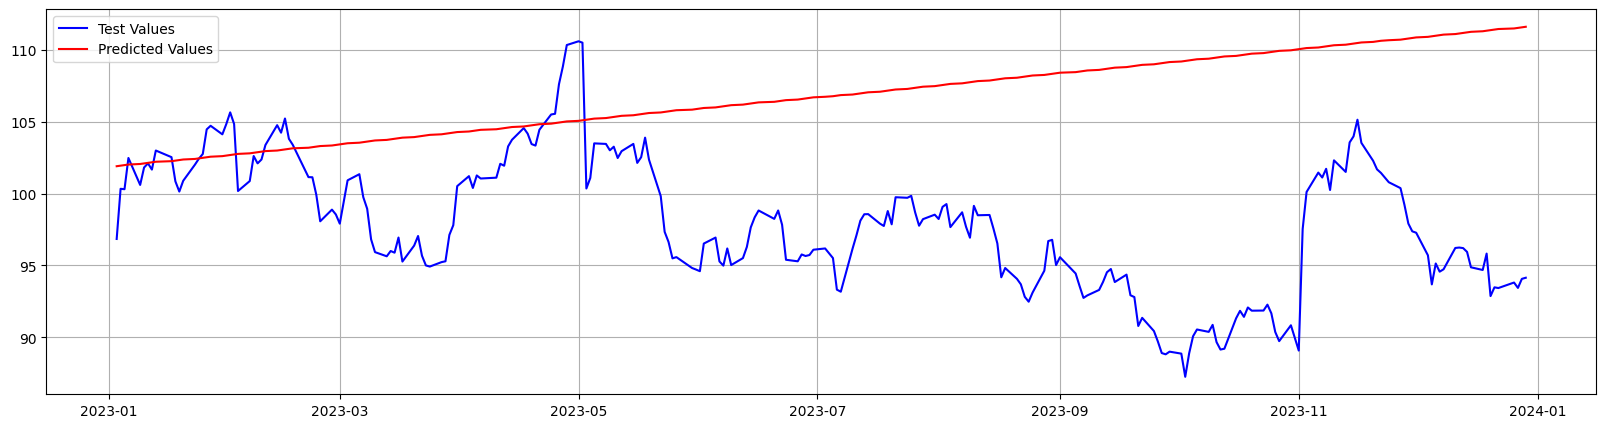

========================= Random Forest Regression =========================
Mean absolute Errors is :
 		 trained data:  0.28778783566427224 
 		 test data:  4.173349924316404
--------------------------------------------------
Root Mean squared Error is :
 		 trained data:  0.4326232276830175 
 		 test data:  5.222321422340934
--------------------------------------------------
R2 score is :
 		 trained data:  0.9994784753544718 
 		 test data:  -0.297935924812736


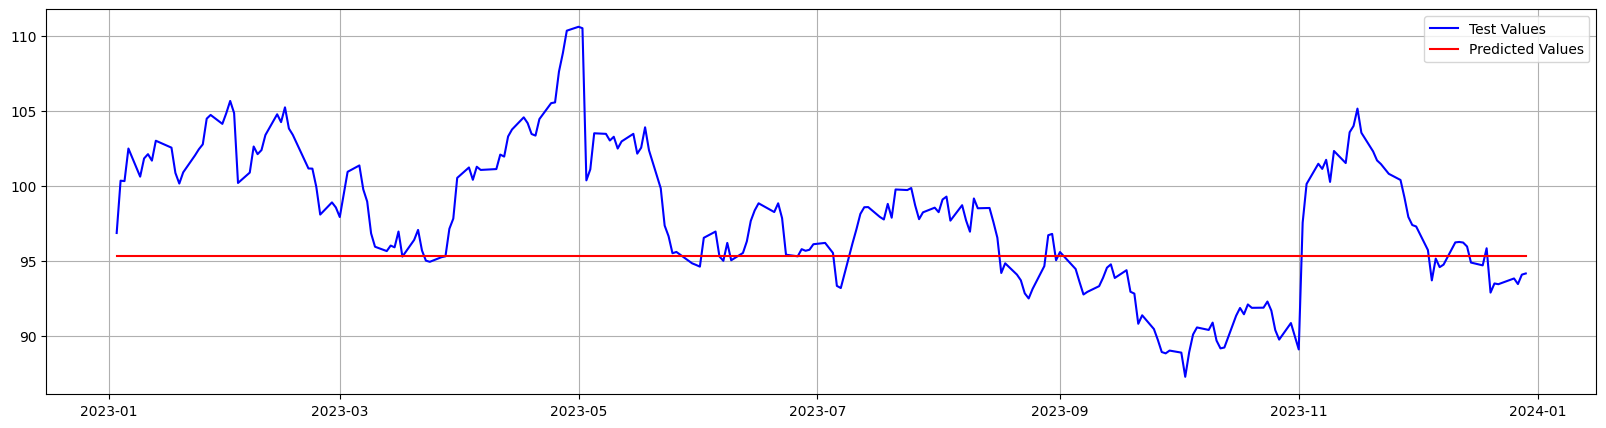

========================= Gradient Boosting Regression =========================
Mean absolute Errors is :
 		 trained data:  0.9868255682518234 
 		 test data:  4.200990025887178
--------------------------------------------------
Root Mean squared Error is :
 		 trained data:  1.4306588160422733 
 		 test data:  5.257113681296458
--------------------------------------------------
R2 score is :
 		 trained data:  0.994296685494428 
 		 test data:  -0.3152878056467394


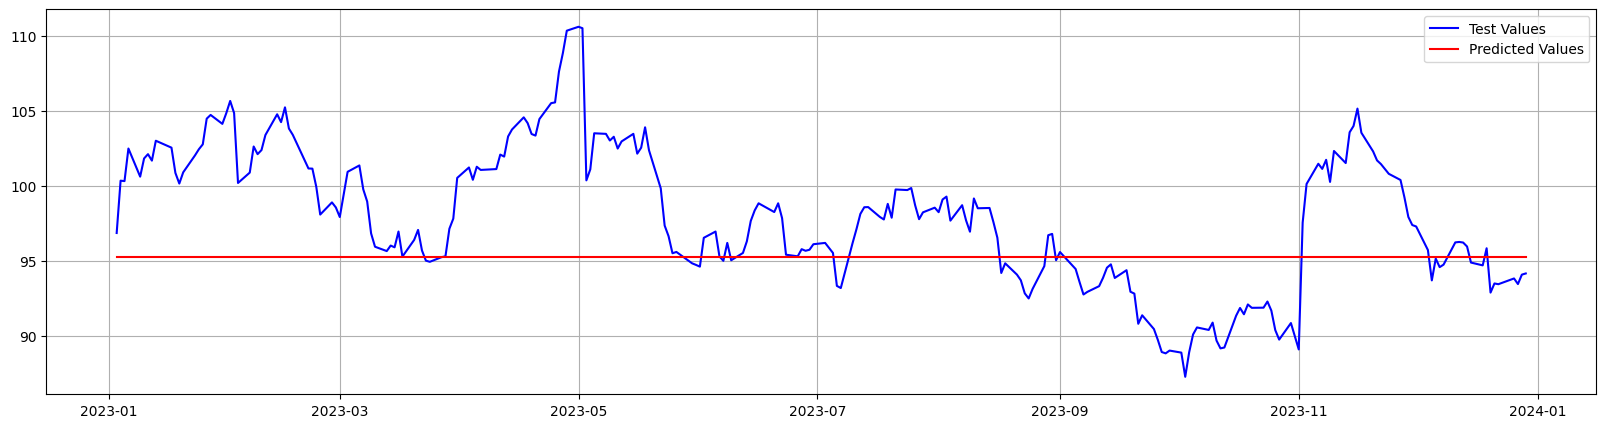

========================= Polynomial Regression =========================
Mean absolute Errors is :
 		 trained data:  8.74102037899938 
 		 test data:  16.303412096588282
--------------------------------------------------
Root Mean squared Error is :
 		 trained data:  10.652525778463195 
 		 test data:  16.785317563263188
--------------------------------------------------
R2 score is :
 		 trained data:  0.6838010976722473 
 		 test data:  -12.408653901206229


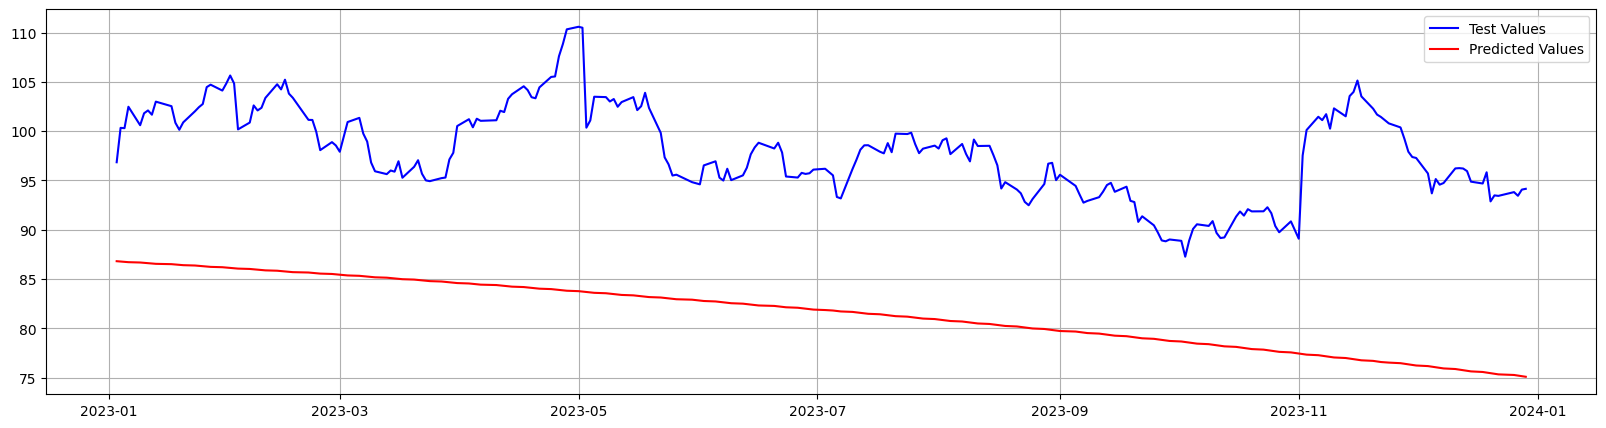

In [156]:
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
evaluating_models(lr_model, "Linear Regression", X_train, X_test, Y_train, Y_test)

#Random Forest Regression
rf_model = RandomForestRegressor()
rf_model = rf_model.fit(X_train, Y_train)
evaluating_models(rf_model, "Random Forest Regression", X_train, X_test, Y_train, Y_test)

#Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor()
gbr_model = gbr_model.fit(X_train, Y_train)
evaluating_models(gbr_model, "Gradient Boosting Regression", X_train, X_test, Y_train, Y_test)

#Polynomial Regression
degree = 2
polyr_model = PolynomialFeatures(degree)
X_polyr_train = polyr_model.fit_transform(X_train)
X_polyr_test = polyr_model.transform(X_test)
plr_model = LinearRegression()
plr_model.fit(X_polyr_train, Y_train)
evaluating_models(plr_model, "Polynomial Regression", X_polyr_train, X_polyr_test, Y_train, Y_test)

In [158]:
    # eval = { "Model" : {"eval tech" : {"train data" : 50, "test data": 40}}}
for mdl in eval.keys():
  print("-"*25,mdl,"-"*25)
  df = pd.DataFrame(eval[mdl])
  print(df)

------------------------- Linear Regression -------------------------
            Mean Absolute Error  Root Mean Squared Error  r2 Score
train data            10.588036                12.601684  0.557501
test data              9.267404                11.057246 -4.818620
------------------------- Random Forest Regression -------------------------
            Mean Absolute Error  Root Mean Squared Error  r2 Score
train data             0.287788                 0.432623  0.999478
test data              4.173350                 5.222321 -0.297936
------------------------- Gradient Boosting Regression -------------------------
            Mean Absolute Error  Root Mean Squared Error  r2 Score
train data             0.986826                 1.430659  0.994297
test data              4.200990                 5.257114 -0.315288
------------------------- Polynomial Regression -------------------------
            Mean Absolute Error  Root Mean Squared Error   r2 Score
train data             8.74

##Forecasting Future Stock Prices:


In [159]:
forecast_dates

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12',
               ...
               '2024-12-17', '2024-12-18', '2024-12-19', '2024-12-20',
               '2024-12-23', '2024-12-24', '2024-12-26', '2024-12-27',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=248, freq=None)

In [160]:
data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day
Dates,,,,,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,2,1,2018,1
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,3,1,2018,2
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,4,1,2018,3
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,5,1,2018,4
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,8,1,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1,11,2024,4
2024-11-04,1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,4,11,2024,0
2024-11-05,1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,5,11,2024,1


In [161]:
year = "2024"
forecate_data_till_specified_year = data.loc[train_start_date:train_end_date]
forecast_input = [index for index in range(len(forecate_data_till_specified_year), len(forecate_data_till_specified_year)+len(forecast_dates))]
forecast_data = pd.DataFrame({
    "dates" : forecast_dates,
    "row_index" : forecast_input
}, index = forecast_dates)
forecast_data

,dates,row_index
2024-01-01,2024-01-01,1259
2024-01-02,2024-01-02,1260
2024-01-03,2024-01-03,1261
2024-01-04,2024-01-04,1262
2024-01-05,2024-01-05,1263
...,...,...
2024-12-24,2024-12-24,1502
2024-12-26,2024-12-26,1503
2024-12-27,2024-12-27,1504
2024-12-30,2024-12-30,1505


In [162]:
type(forecast_data["row_index"])

pandas.core.series.Series

========================= LinearRegression =========================


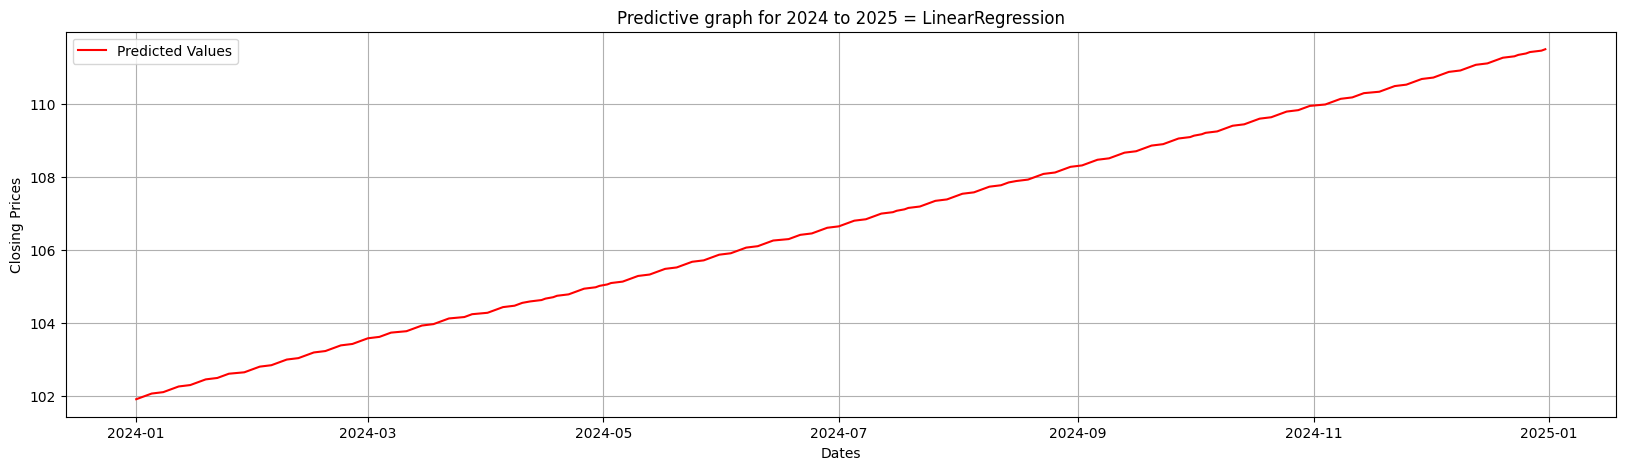

========================= RandomForestRegressor =========================


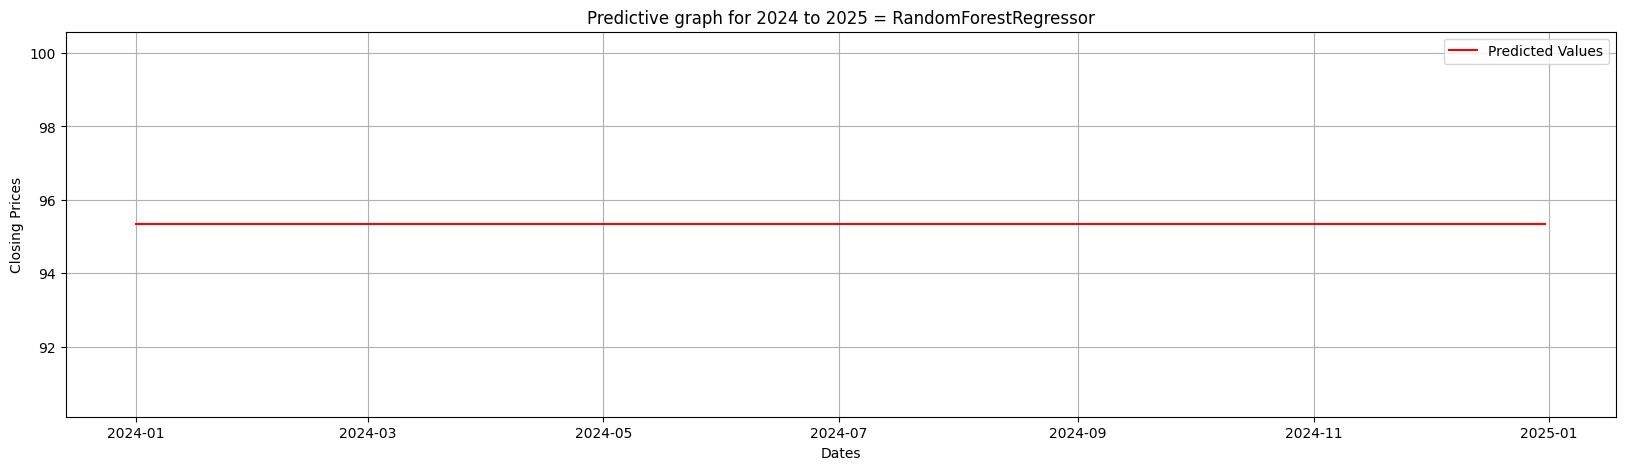

========================= GradientBoostingRegressor =========================


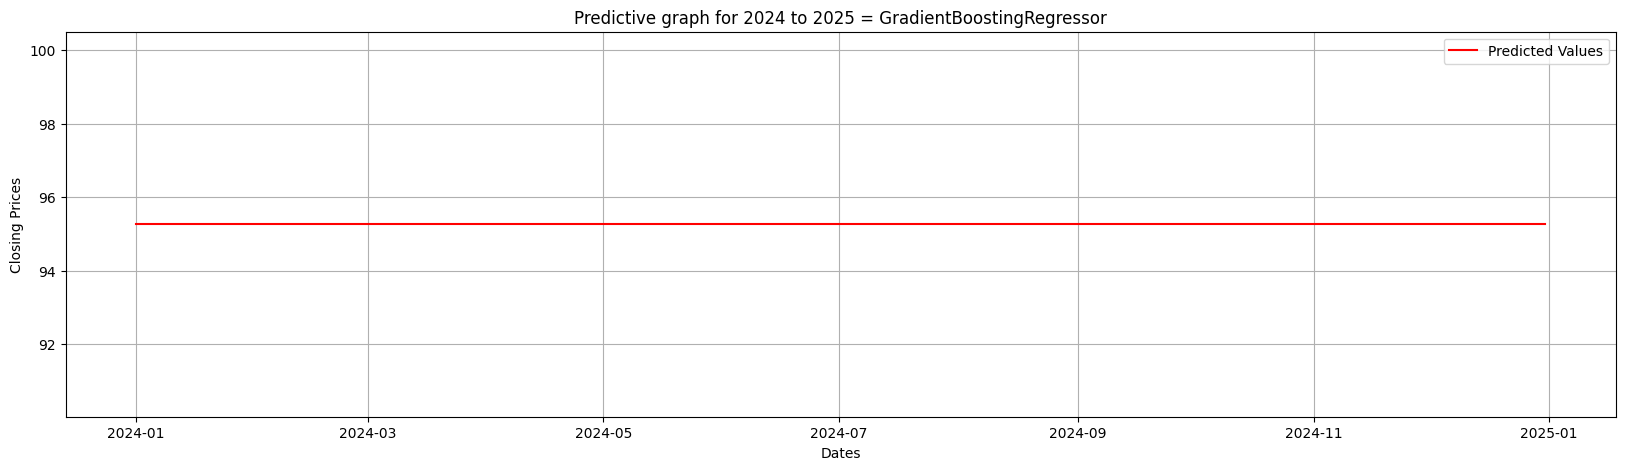

In [163]:
models = [lr_model, rf_model, gbr_model]
input_row_index = np.array(forecast_data["row_index"]).reshape(-1, 1)
c=0
for model in models:
  print("="*25,type(model).__name__,"="*25)
  Y_pred = model.predict(input_row_index)
  if(c<=1):
    rf_model_pred = Y_pred
  c==1
  plt.figure(figsize=(20, 5))
  plt.plot(forecast_data["dates"], Y_pred, label="Predicted Values", color='red')  # Predicted values in red
  plt.legend()
  plt.title(f"Predictive graph for 2024 to 2025 = {type(model).__name__}")
  plt.xlabel("Dates")
  plt.ylabel("Closing Prices")
  plt.grid(True)
  plt.show()



##Visualization

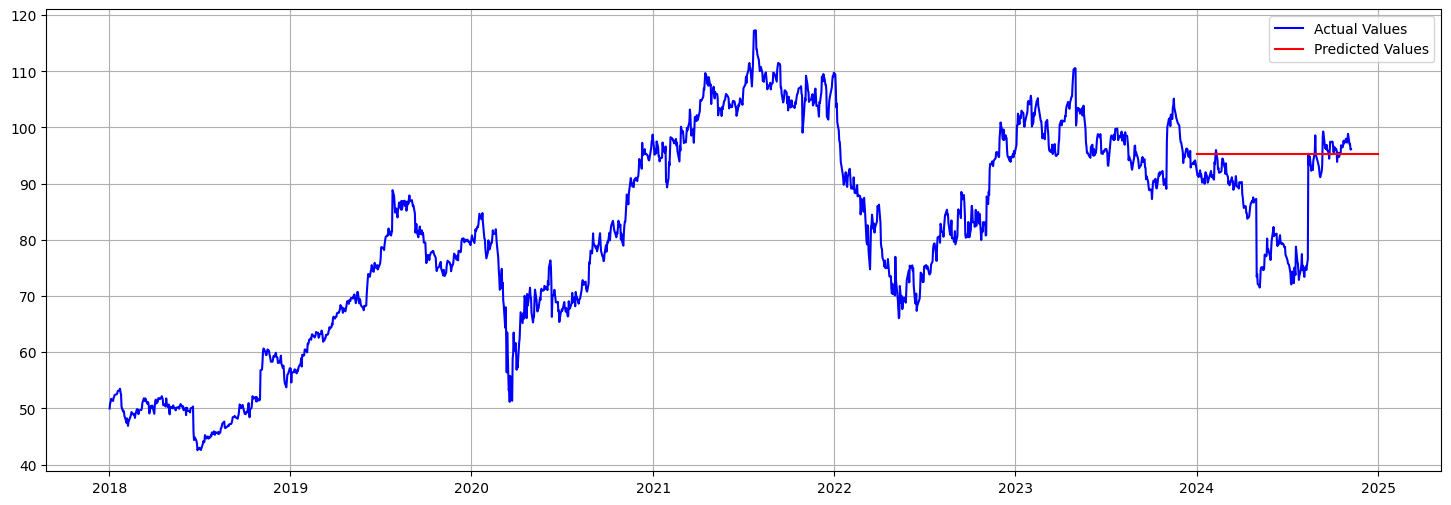

In [164]:
# limit_dates = data[data['Dates'] < "2024-01-01"]
# data_index = data.loc[data['Dates'] < "2024-01-01", 'row_index']

plt.figure(figsize=(18, 6))
plt.plot(data["Dates"], data["Close"], label="Actual Values", color="blue")
plt.plot(forecast_data["dates"], rf_model_pred, label="Predicted Values", color='red')  # Predicted values in red
plt.legend()
plt.grid(True)
plt.show()

#Day - 2


#Classification Models for Stock Movement Prediction

In [165]:
  data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day
Dates,,,,,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,2,1,2018,1
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,3,1,2018,2
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,4,1,2018,3
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,5,1,2018,4
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,8,1,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1,11,2024,4
2024-11-04,1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,4,11,2024,0
2024-11-05,1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,5,11,2024,1


In [166]:
data["Returns"] = data["Close"].pct_change()
data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day,Returns
Dates,,,,,,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,2,1,2018,1,NaN
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,3,1,2018,2,0.018740
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,4,1,2018,3,0.003747
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,5,1,2018,4,0.011539
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,8,1,2018,0,-0.005033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1,11,2024,4,0.011975
2024-11-04,1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,4,11,2024,0,-0.018610
2024-11-05,1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,5,11,2024,1,0.000618


In [167]:
data["Returns"] = data["Returns"].fillna(0)
data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day,Returns
Dates,,,,,,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,2,1,2018,1,0.000000
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,3,1,2018,2,0.018740
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,4,1,2018,3,0.003747
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,5,1,2018,4,0.011539
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,8,1,2018,0,-0.005033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1,11,2024,4,0.011975
2024-11-04,1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,4,11,2024,0,-0.018610
2024-11-05,1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,5,11,2024,1,0.000618


In [168]:
data["Clf_Returns"] = data["Returns"].apply(lambda x: 1 if x > 0 else 0)
data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day,Returns,Clf_Returns
Dates,,,,,,,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,2,1,2018,1,0.000000,0
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,3,1,2018,2,0.018740,1
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,4,1,2018,3,0.003747,1
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,5,1,2018,4,0.011539,1
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,8,1,2018,0,-0.005033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1,11,2024,4,0.011975,1
2024-11-04,1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,4,11,2024,0,-0.018610,0
2024-11-05,1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,5,11,2024,1,0.000618,1


In [169]:
train_data =  data.loc[train_start_date:train_end_date]
train_data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day,Returns,Clf_Returns
Dates,,,,,,,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,2,1,2018,1,0.000000,0
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,3,1,2018,2,0.018740,1
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,4,1,2018,3,0.003747,1
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,5,1,2018,4,0.011539,1
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,8,1,2018,0,-0.005033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,1254,2022-12-23,93.730991,94.412922,93.049067,94.384102,3944500,0.0,0.0,23,12,2022,4,0.005217,1
2022-12-27,1255,2022-12-27,94.672251,95.527057,94.326486,95.277336,4402500,0.0,0.0,27,12,2022,1,0.009464,1
2022-12-28,1256,2022-12-28,95.479040,95.959269,94.499370,94.701065,3491500,0.0,0.0,28,12,2022,2,-0.006048,0


In [170]:
test_data = data.loc[test_start_date:test_end_date]
test_data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day,Returns,Clf_Returns
Dates,,,,,,,,,,,,,,,
2023-01-03,1259,2023-01-03,96.583553,97.169432,95.536658,96.842880,6607700,0.0,0.0,3,1,2023,1,0.016431,1
2023-01-04,1260,2023-01-04,98.629332,100.588666,98.494869,100.329338,8166600,0.0,0.0,4,1,2023,2,0.036001,1
2023-01-05,1261,2023-01-05,100.358155,100.944034,99.397698,100.300529,5575100,0.0,0.0,5,1,2023,3,-0.000287,0
2023-01-06,1262,2023-01-06,101.212950,102.768893,100.857585,102.471153,9644100,0.0,0.0,6,1,2023,4,0.021641,1
2023-01-09,1263,2023-01-09,102.307879,102.461556,100.300527,100.598267,10124800,0.0,0.0,9,1,2023,0,-0.018277,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,1504,2023-12-22,93.049898,93.971672,92.510561,93.432335,6360400,0.0,0.0,22,12,2023,4,-0.000525,0
2023-12-26,1505,2023-12-26,93.491171,93.834390,93.118543,93.814774,3709500,0.0,0.0,26,12,2023,1,0.004093,1
2023-12-27,1506,2023-12-27,93.834391,93.922642,92.951842,93.442146,4959300,0.0,0.0,27,12,2023,2,-0.003972,0


In [171]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   row_index     250 non-null    int64         
 1   Dates         250 non-null    datetime64[ns]
 2   Open          250 non-null    float64       
 3   High          250 non-null    float64       
 4   Low           250 non-null    float64       
 5   Close         250 non-null    float64       
 6   Volume        250 non-null    int64         
 7   Dividends     250 non-null    float64       
 8   Stock Splits  250 non-null    float64       
 9   Date          250 non-null    int32         
 10  Month         250 non-null    int32         
 11  Year          250 non-null    int32         
 12  Day           250 non-null    int32         
 13  Returns       250 non-null    float64       
 14  Clf_Returns   250 non-null    int64         
dtypes: datetime64[ns](1),

In [172]:
required_columns = ["Dates","row_index"]
X_train_ = train_data[required_columns]
X_test_ = test_data[required_columns]

X_train = X_train_.drop(["Dates"], axis = 1)
Y_train = train_data["Clf_Returns"]
X_test = X_test_.drop(["Dates"], axis = 1)
Y_test = test_data["Clf_Returns"]


In [173]:
X_train

,row_index
Dates,
2018-01-02,0
2018-01-03,1
2018-01-04,2
2018-01-05,3
2018-01-08,4
...,...
2022-12-23,1254
2022-12-27,1255
2022-12-28,1256


In [174]:
Y_test.shape

(250,)

In [175]:
eval_clf = {}
def evaluating_clf_models(model, name, X_train, X_test, Y_train, Y_test):
  if(name not in eval.keys()):
    eval_clf[name] = {}
    eval_clf[name]["Accuracy Score"] ={}
    eval_clf[name]["Accuracy Score"]["train data"] = 0
    eval_clf[name]["Accuracy Score"]["test data"] = 0
    eval_clf[name]["Precision Score"] ={}
    eval_clf[name]["Precision Score"]["train data"] = 0
    eval_clf[name]["Precision Score"]["test data"] = 0
    eval_clf[name]["Recall Score"] ={}
    eval_clf[name]["Recall Score"]["train data"] = 0
    eval_clf[name]["Recall Score"]["test data"] = 0
    eval_clf[name]["F1 Score"] ={}
    eval_clf[name]["F1 Score"]["train data"] = 0
    eval_clf[name]["F1 Score"]["test data"] = 0
    # eval_clf = { "Model" : {"eval tech" : {"train data" : 50, "test data": 40}}}

  print("="*25, name , "="*25)
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)
  # print(Y_test, Y_test_pred)

  train_accuracy = accuracy_score(Y_train, Y_train_pred)
  test_accuracy = accuracy_score(Y_test, Y_test_pred)
  print("Accuracy is :\n \t\t trained data: ",train_accuracy,"\n \t\t test data: ", test_accuracy)
  eval_clf[name]["Accuracy Score"]["train data"] = train_accuracy
  eval_clf[name]["Accuracy Score"]["test data"] = test_accuracy
  print("-"*50)

  train_precision = precision_score(Y_train, Y_train_pred, zero_division=1)
  test_precision = precision_score(Y_test, Y_test_pred,  zero_division=1)
  print("Precision is :\n \t\t trained data: ",train_precision,"\n \t\t test data: ", test_precision)
  eval_clf[name]["Precision Score"]["train data"] = train_precision
  eval_clf[name]["Precision Score"]["test data"] = test_precision
  print("-"*50)

  train_recall = recall_score(Y_train, Y_train_pred)
  test_recall = recall_score(Y_test, Y_test_pred)
  print("Recall is :\n \t\t trained data: ",train_recall,"\n \t\t test data: ", test_recall)
  eval_clf[name]["Recall Score"]["train data"] = train_recall
  eval_clf[name]["Recall Score"]["test data"] = test_recall
  print("-"*50)

  train_f1 = f1_score(Y_train, Y_train_pred)
  test_f1 = f1_score(Y_test, Y_test_pred)
  print("F1 score is :\n \t\t trained data: ",train_f1,"\n \t\t test data: ", test_f1)
  eval_clf[name]["F1 Score"]["train data"] = train_f1
  eval_clf[name]["F1 Score"]["test data"] = test_f1

  #plotting
  plt.figure(figsize=(20, 5))
  plt.plot(test_data["Dates"], Y_test, label="Test Values", color='blue')  # Test values in blue
  plt.plot(test_data["Dates"], Y_test_pred, label="Predicted Values", color='red')  # Predicted values in red
  gph_name = "Test data v/s Predicted data for "+name
  plt.title(gph_name)
  plt.legend()
  plt.grid(True)
  plt.show()
  print("\n")

  # confusion matrix
  confusion_matrix_ = confusion_matrix(Y_test, Y_test_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(confusion_matrix_, annot=True, cmap="Blues")
  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  cm_title = "Confusion Matrix for "+name
  plt.title(cm_title)
  plt.show()
  print("\n")

  #ROC Curve
  roc_name = "ROC Curve For "+name
  Y_prob_score = model.predict_proba(X_test)[:,1]
  print(Y_prob_score.shape)
  fpr, tpr, th = roc_curve( Y_test, Y_prob_score)
  # print(fpr, tpr, th)
  plt.plot(fpr, tpr)
  plt.title(roc_name)
  plt.xlabel("False Prositive Rate")
  plt.ylabel("True Positive Rate")
  plt.show()
  print("\n")


========================= Logistic Regression =========================
Accuracy is :
 		 trained data:  0.5178713264495631 
 		 test data:  0.5
--------------------------------------------------
Precision is :
 		 trained data:  0.5263157894736842 
 		 test data:  1.0
--------------------------------------------------
Recall is :
 		 trained data:  0.858433734939759 
 		 test data:  0.0
--------------------------------------------------
F1 score is :
 		 trained data:  0.6525472238122496 
 		 test data:  0.0


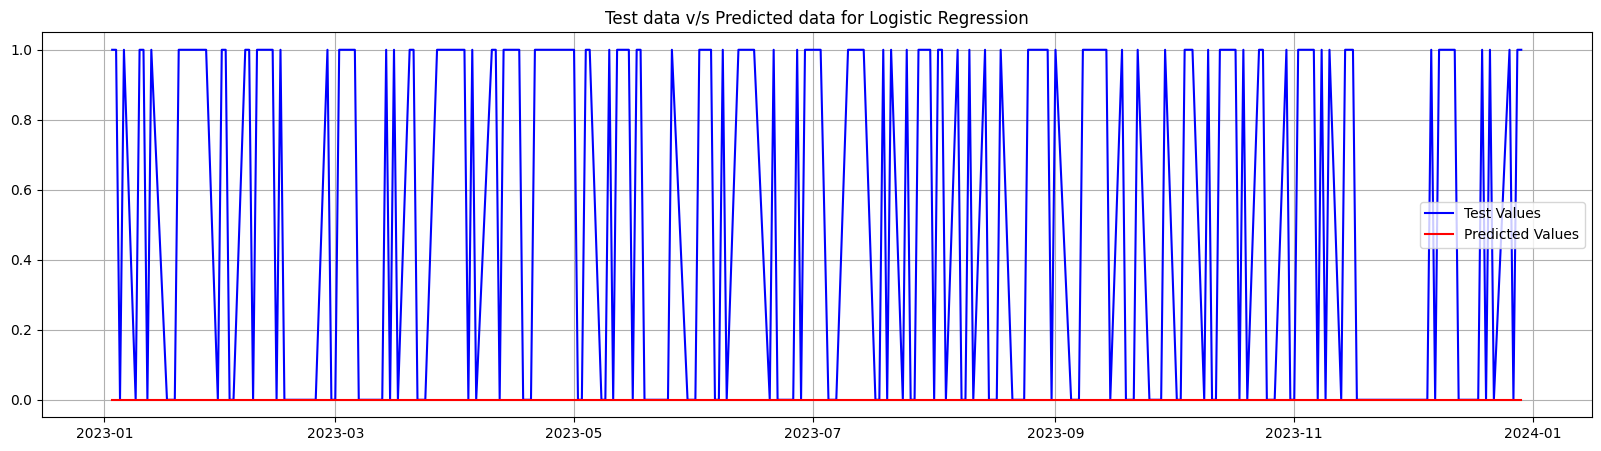

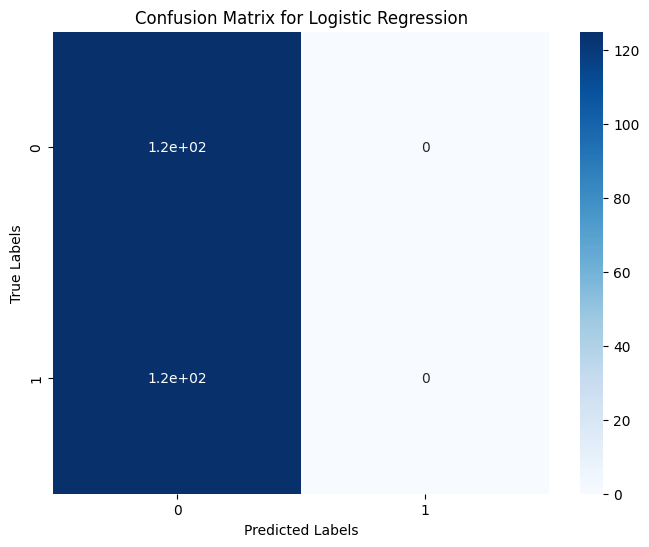



(250,)


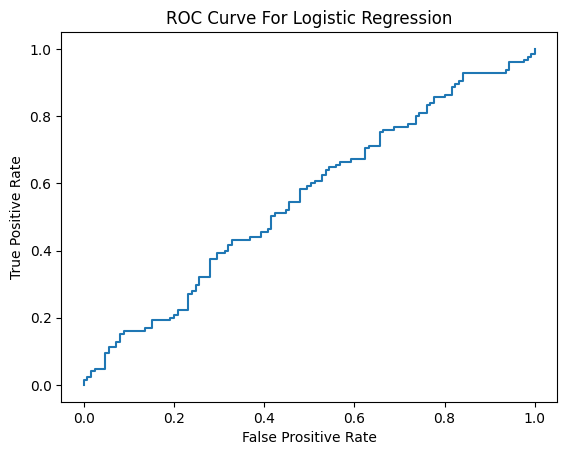



========================= Random Forest Classifier =========================
Accuracy is :
 		 trained data:  0.9992057188244639 
 		 test data:  0.5
--------------------------------------------------
Precision is :
 		 trained data:  0.9984962406015038 
 		 test data:  1.0
--------------------------------------------------
Recall is :
 		 trained data:  1.0 
 		 test data:  0.0
--------------------------------------------------
F1 score is :
 		 trained data:  0.999247554552295 
 		 test data:  0.0


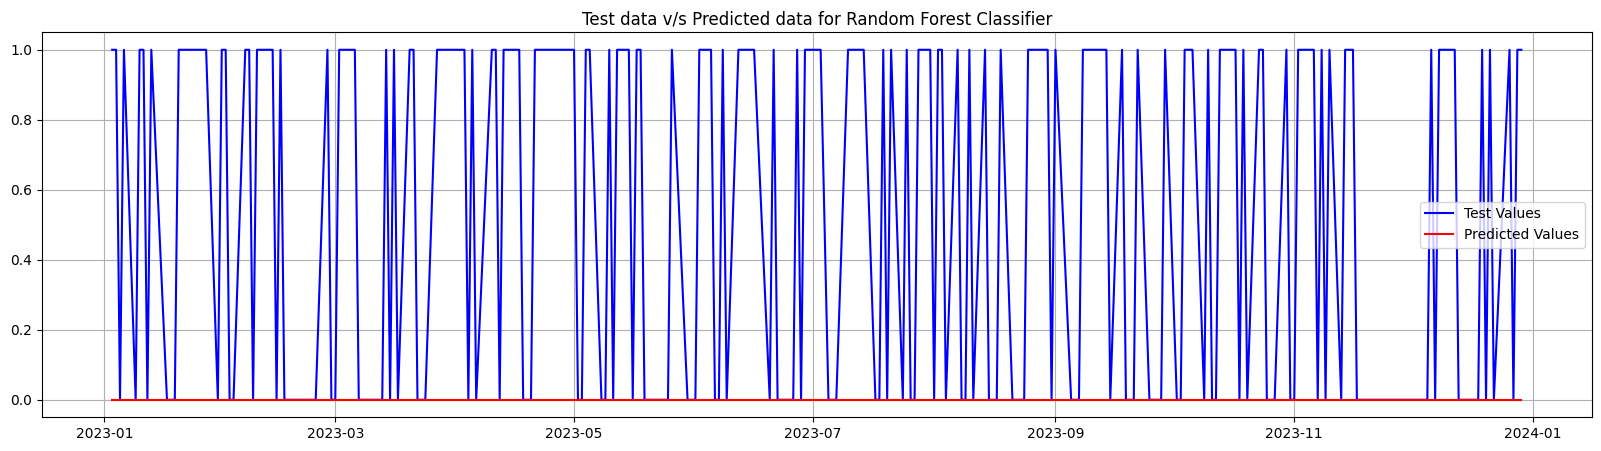

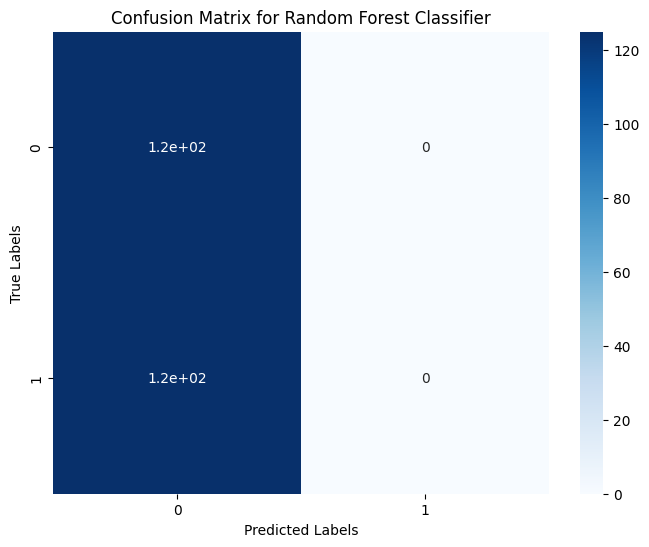



(250,)


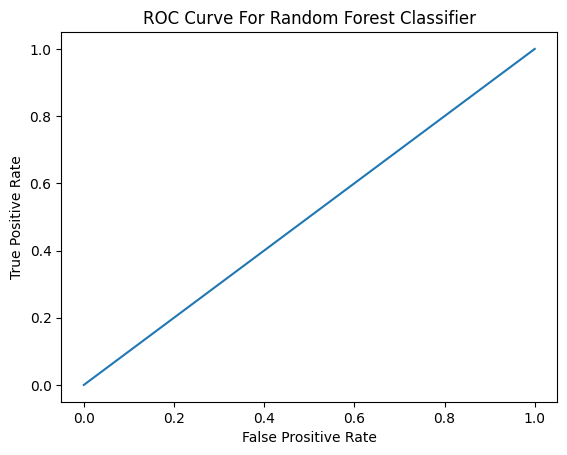



========================= Decision Tree Classifier =========================
Accuracy is :
 		 trained data:  1.0 
 		 test data:  0.5
--------------------------------------------------
Precision is :
 		 trained data:  1.0 
 		 test data:  1.0
--------------------------------------------------
Recall is :
 		 trained data:  1.0 
 		 test data:  0.0
--------------------------------------------------
F1 score is :
 		 trained data:  1.0 
 		 test data:  0.0


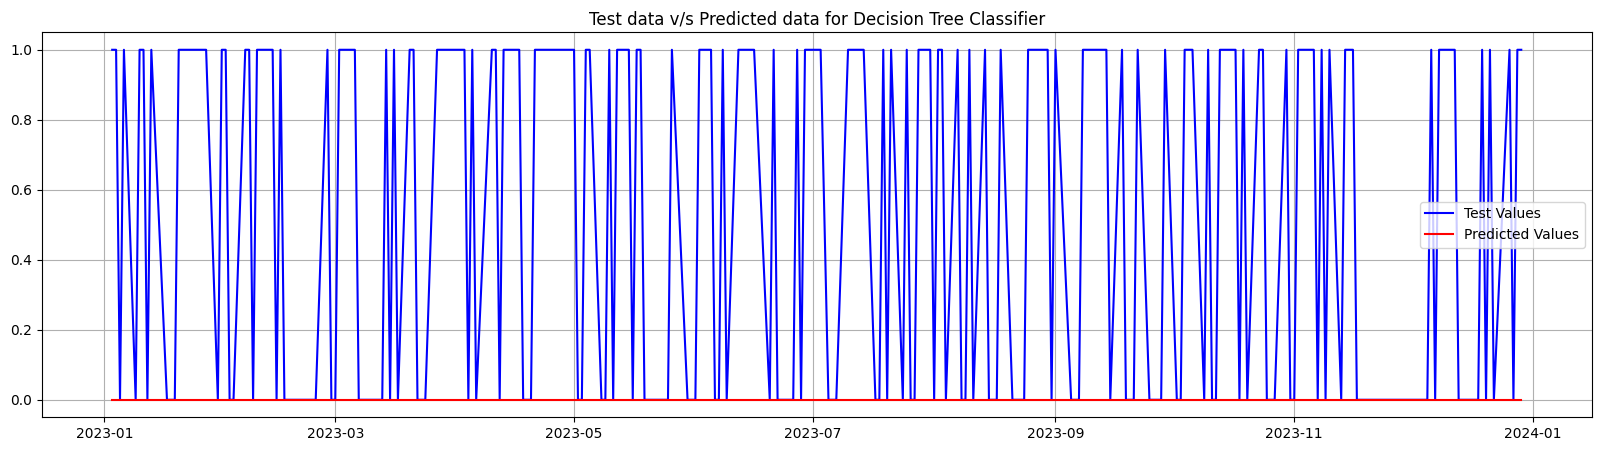

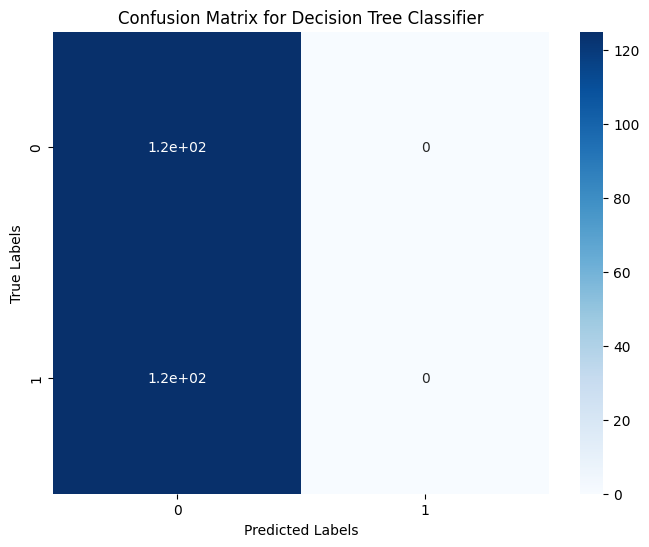



(250,)


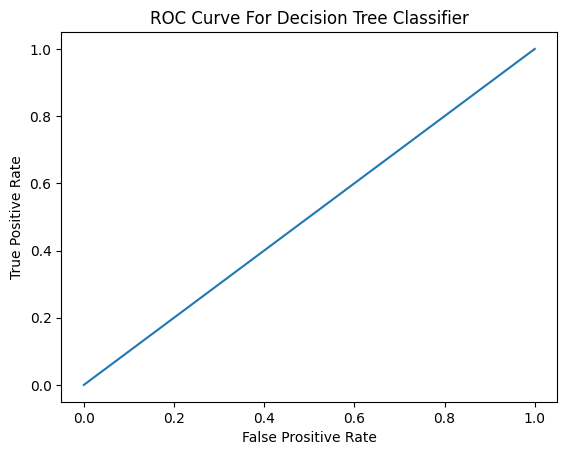

In [176]:
#Logistic Regression
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)
evaluating_clf_models(lg_model, "Logistic Regression", X_train, X_test, Y_train, Y_test)

#Random Forest Classifier
rf_clf_model = RandomForestClassifier()
rf_clf_model.fit(X_train, Y_train)
evaluating_clf_models(rf_clf_model, "Random Forest Classifier", X_train, X_test, Y_train, Y_test)

#Decision Trees
dt_clf_model = DecisionTreeClassifier()
dt_clf_model.fit(X_train,  Y_train)
evaluating_clf_models(dt_clf_model, "Decision Tree Classifier", X_train, X_test, Y_train, Y_test)

In [177]:
for mdl in eval_clf.keys():
  print("-"*25,mdl,"-"*25)
  df = pd.DataFrame(eval_clf[mdl])
  print(df)

------------------------- Logistic Regression -------------------------
            Accuracy Score  Precision Score  Recall Score  F1 Score
train data        0.517871         0.526316      0.858434  0.652547
test data         0.500000         1.000000      0.000000  0.000000
------------------------- Random Forest Classifier -------------------------
            Accuracy Score  Precision Score  Recall Score  F1 Score
train data        0.999206         0.998496           1.0  0.999248
test data         0.500000         1.000000           0.0  0.000000
------------------------- Decision Tree Classifier -------------------------
            Accuracy Score  Precision Score  Recall Score  F1 Score
train data             1.0              1.0           1.0       1.0
test data              0.5              1.0           0.0       0.0


In [178]:
#Logistic Regression values parameters for Hypertuning
penality_values = ["l1", "l2", "elasticnet", None]    #l2 - Specifies the regularization technique.
c_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]    #1
solver_values = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]    #lbfgs
max_iter_values = [int(x) for x in np.linspace(100, 2000, 10)]
logistic_random_search_params = {
    "penalty": penality_values,
    "C": c_values,
    "solver": solver_values,
    "max_iter": max_iter_values
}

#Random Forest values parameters for Hypertuning
n_estimators_values = [int(x) for x in np.linspace(200, 400, 50)]
max_features_values = ["sqrt", "log2", None]
criterion_values = ["gini", "entropy"]
max_depth_values = [None, 3, 4, 5]
min_samples_split_values = [2, 3]
min_samples_leaf_values = [2, 3]
random_forest_clf_random_search_params = {
    "n_estimators": n_estimators_values,
    "max_features": max_features_values,
    "criterion": criterion_values,
    "max_depth": max_depth_values,
    "min_samples_split": min_samples_split_values,
    "min_samples_leaf": min_samples_leaf_values
}

#Decision Tree values parameters for Hypertuning
splitter_values = ["best", "random"]
decision_tree_clf_random_search_params = {
    "criterion": criterion_values,
    "splitter": splitter_values,
    "min_samples_split": min_samples_split_values,
    "min_samples_leaf": min_samples_leaf_values,
    "max_features": max_features_values
}

In [179]:
logistic_random_SearchCV = RandomizedSearchCV(estimator = lg_model, param_distributions = logistic_random_search_params, n_iter = 200, random_state = 100, cv = 3)
logistic_random_SearchCV.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=200,
                   param_distributions={'C': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                              0.7, 0.8, 0.9, 1],
                                        'max_iter': [100, 311, 522, 733, 944,
                                                     1155, 1366, 1577, 1788,
                                                     2000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   random_state=100)

In [180]:
logistic_random_SearchCV.best_estimator_

LogisticRegression(C=0.5, max_iter=733, solver='sag')

In [181]:
random_forest_random_SearchCV = RandomizedSearchCV(estimator = rf_clf_model, param_distributions = random_forest_clf_random_search_params, n_iter = 200, random_state = 100, cv = 3, error_score = "raise")
random_forest_random_SearchCV.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 3, 4, 5],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [2, 3],
                                        'n_estimators': [200, 204, 208, 212,
                                                         216, 220, 224, 228,
                                                         232, 236, 240, 244,
                                                         248, 253, 257, 261,
                                                         265, 269, 273, 277,
                                                         281, 285, 289, 293,
                                                         297, 302, 306, 310,
                                                         314, 318, ...]},
                   random_state=100)

In [182]:
random_forest_random_SearchCV.best_estimator_

RandomForestClassifier(max_features=None, min_samples_leaf=3, n_estimators=216)

In [183]:
Decision_tree_random_SearchCV = RandomizedSearchCV(estimator = dt_clf_model, param_distributions = decision_tree_clf_random_search_params, n_iter = 200, random_state = 100, cv = 3)
Decision_tree_random_SearchCV.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=200,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [2, 3],
                                        'splitter': ['best', 'random']},
                   random_state=100)

In [184]:
Decision_tree_random_SearchCV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=3,
                       splitter='random')

========================= Linear Regression After Random =========================
Accuracy is :
 		 trained data:  0.5274027005559968 
 		 test data:  0.5
--------------------------------------------------
Precision is :
 		 trained data:  0.5274027005559968 
 		 test data:  0.5
--------------------------------------------------
Recall is :
 		 trained data:  1.0 
 		 test data:  1.0
--------------------------------------------------
F1 score is :
 		 trained data:  0.6905876235049402 
 		 test data:  0.6666666666666666


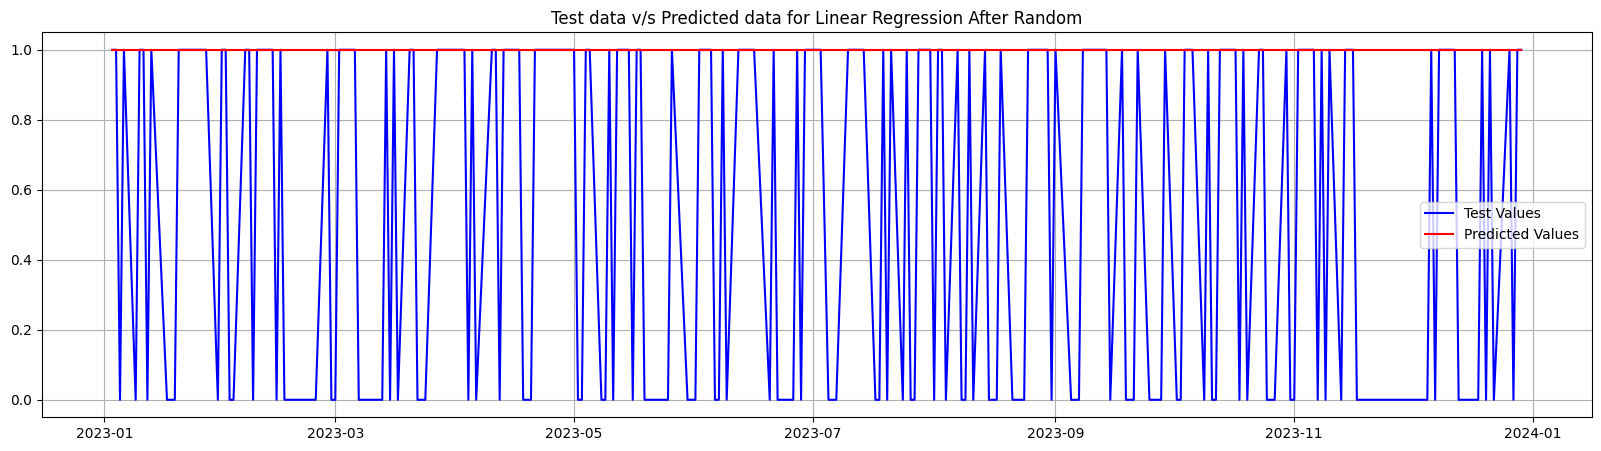

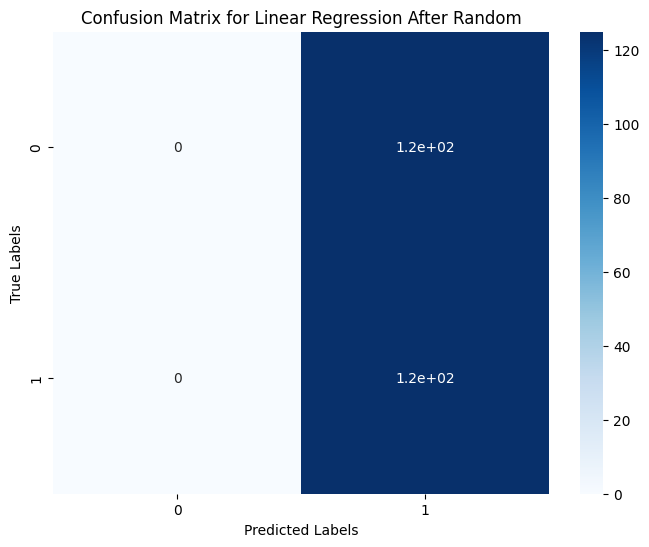



(250,)


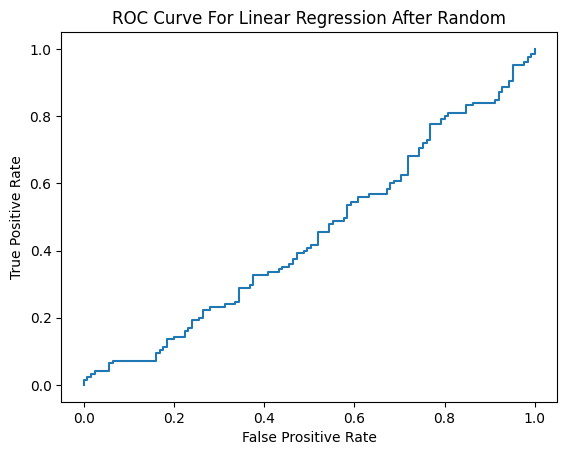



========================= Random Forest Regression After Random =========================
Accuracy is :
 		 trained data:  0.7934868943606036 
 		 test data:  0.5
--------------------------------------------------
Precision is :
 		 trained data:  0.7936046511627907 
 		 test data:  1.0
--------------------------------------------------
Recall is :
 		 trained data:  0.822289156626506 
 		 test data:  0.0
--------------------------------------------------
F1 score is :
 		 trained data:  0.8076923076923077 
 		 test data:  0.0


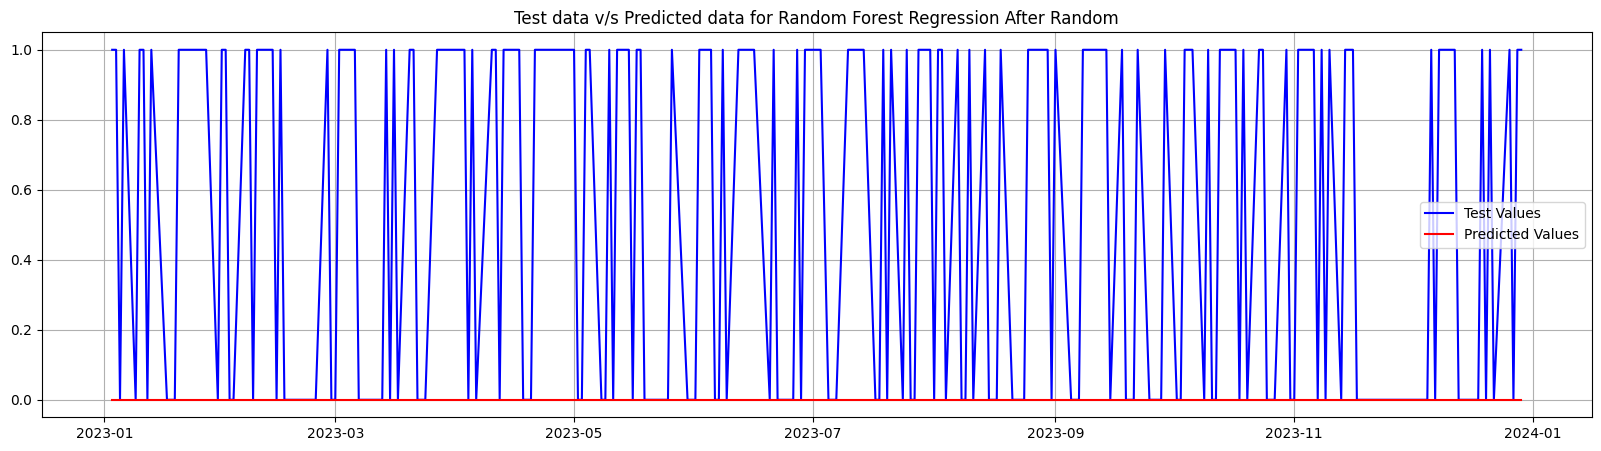

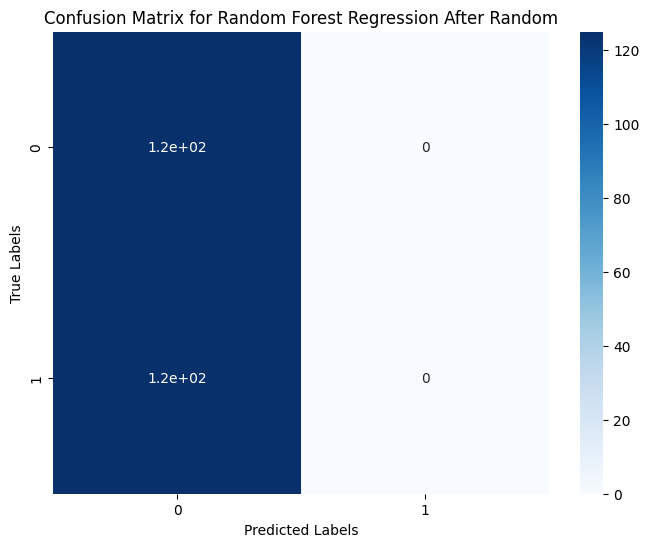



(250,)


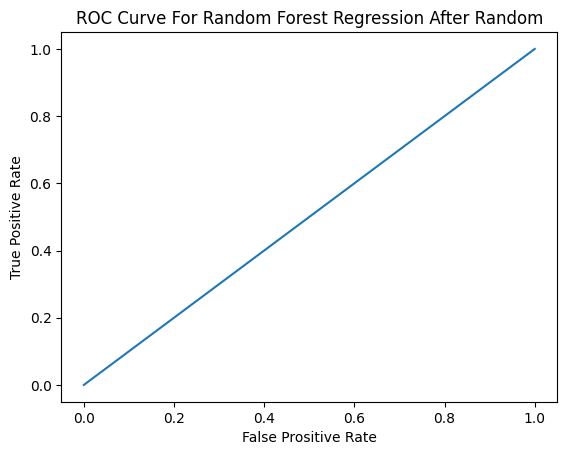



========================= Decision tree After Random =========================
Accuracy is :
 		 trained data:  0.6664019062748213 
 		 test data:  0.5
--------------------------------------------------
Precision is :
 		 trained data:  0.7337164750957854 
 		 test data:  1.0
--------------------------------------------------
Recall is :
 		 trained data:  0.5768072289156626 
 		 test data:  0.0
--------------------------------------------------
F1 score is :
 		 trained data:  0.6458684654300169 
 		 test data:  0.0


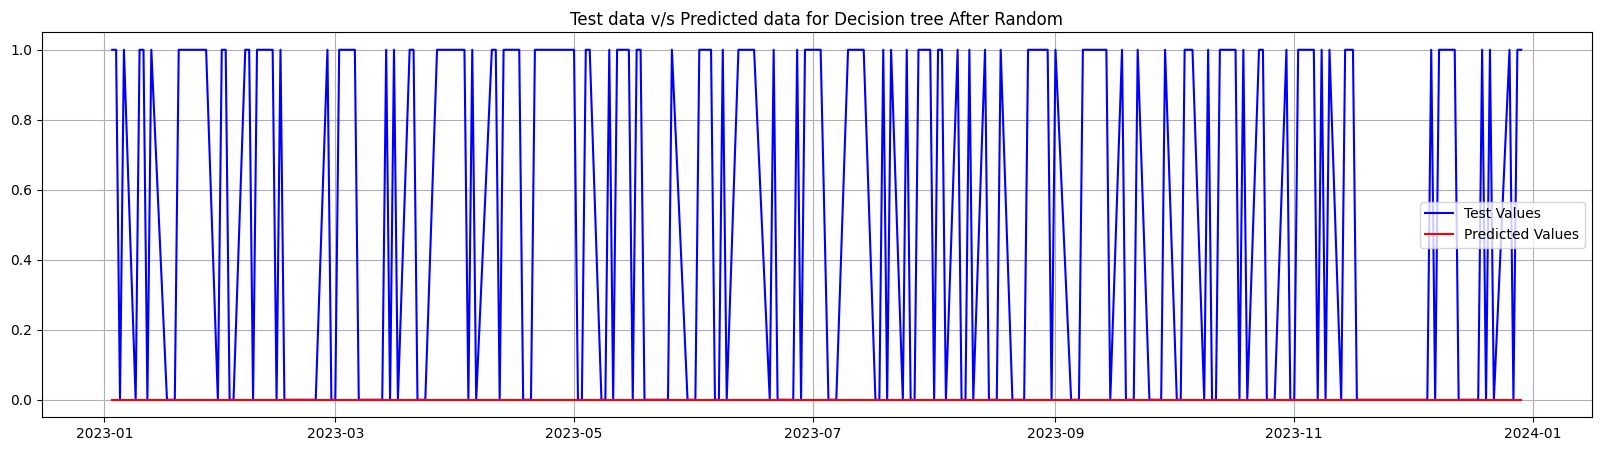

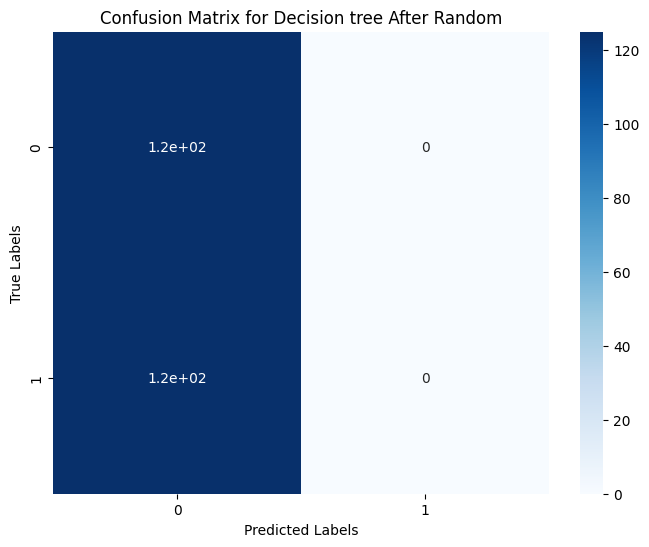



(250,)


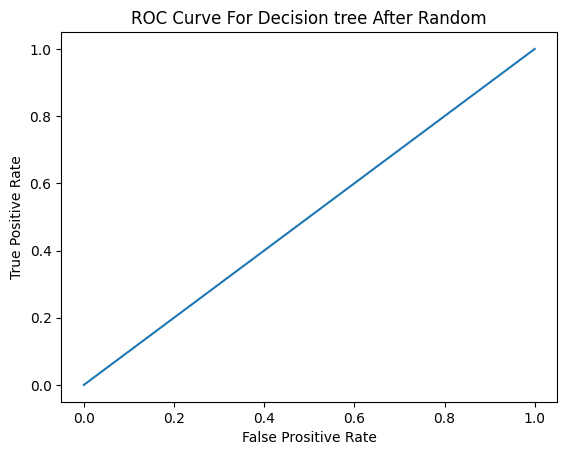

In [185]:
evaluating_clf_models(logistic_random_SearchCV, "Linear Regression After Random", X_train, X_test, Y_train, Y_test)
evaluating_clf_models(random_forest_random_SearchCV, "Random Forest Regression After Random", X_train, X_test, Y_train, Y_test)
evaluating_clf_models(Decision_tree_random_SearchCV, "Decision tree After Random", X_train, X_test, Y_train, Y_test)

In [186]:
logistic_random_SearchCV.best_params_

{'solver': 'sag', 'penalty': 'l2', 'max_iter': 733, 'C': 0.5}

In [187]:
random_forest_random_SearchCV.best_params_

{'n_estimators': 216,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': None,
 'max_depth': None,
 'criterion': 'gini'}

In [188]:
Decision_tree_random_SearchCV.best_params_

{'splitter': 'random',
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'criterion': 'entropy'}

In [189]:
logistic_grid_params = {      #C=0.9, max_iter=1366, solver='sag'
    "penalty": [logistic_random_SearchCV.best_params_["penalty"]],
    "C": [logistic_random_SearchCV.best_params_["C"]-2,
          logistic_random_SearchCV.best_params_["C"]-1,
          logistic_random_SearchCV.best_params_["C"],
          logistic_random_SearchCV.best_params_["C"]+1,
          logistic_random_SearchCV.best_params_["C"]+2,
          ],
    "solver": [logistic_random_SearchCV.best_params_["solver"]],
    "max_iter": [logistic_random_SearchCV.best_params_["max_iter"]-2,
                 logistic_random_SearchCV.best_params_["max_iter"]-1,
                 logistic_random_SearchCV.best_params_["max_iter"],
                 logistic_random_SearchCV.best_params_["max_iter"]+1,
                 logistic_random_SearchCV.best_params_["max_iter"]+2
                ]
}

# max_features='log2', min_samples_leaf=3,n_estimators=208
random_forest_clf_grid_params = {
    "n_estimators": [random_forest_random_SearchCV.best_params_["n_estimators"]-2,
                     random_forest_random_SearchCV.best_params_["n_estimators"]-1,
                     random_forest_random_SearchCV.best_params_["n_estimators"],
                     random_forest_random_SearchCV.best_params_["n_estimators"]+1,
                     random_forest_random_SearchCV.best_params_["n_estimators"]+2,
                    ],
    "max_features": [random_forest_random_SearchCV.best_params_["max_features"]],
    "criterion": [random_forest_random_SearchCV.best_params_["criterion"]],
    "max_depth": [random_forest_random_SearchCV.best_params_["max_depth"]],
    "min_samples_split": [random_forest_random_SearchCV.best_params_["min_samples_split"]-2,
                  random_forest_random_SearchCV.best_params_["min_samples_split"]-1,
                  random_forest_random_SearchCV.best_params_["min_samples_split"],
                  random_forest_random_SearchCV.best_params_["min_samples_split"]+1,
                  random_forest_random_SearchCV.best_params_["min_samples_split"]+2,
                ],
    "min_samples_leaf": [random_forest_random_SearchCV.best_params_["min_samples_leaf"]-2,
                  random_forest_random_SearchCV.best_params_["min_samples_leaf"]-1,
                  random_forest_random_SearchCV.best_params_["min_samples_leaf"],
                  random_forest_random_SearchCV.best_params_["min_samples_leaf"]+1,
                  random_forest_random_SearchCV.best_params_["min_samples_leaf"]+2,
                ],
}

# criterion='entropy', max_features='sqrt', min_samples_leaf=3, min_samples_split=3, splitter='random'
decision_tree_clf_grid_params = {
    "criterion": [Decision_tree_random_SearchCV.best_params_["criterion"]],
    "splitter": [Decision_tree_random_SearchCV.best_params_["splitter"]],
    "min_samples_split": [Decision_tree_random_SearchCV.best_params_["min_samples_split"]-2,
                          Decision_tree_random_SearchCV.best_params_["min_samples_split"]-1,
                          Decision_tree_random_SearchCV.best_params_["min_samples_split"],
                          Decision_tree_random_SearchCV.best_params_["min_samples_split"]+1,
                          Decision_tree_random_SearchCV.best_params_["min_samples_split"]+2
                        ],
    "min_samples_leaf": [Decision_tree_random_SearchCV.best_params_["min_samples_leaf"],
                          Decision_tree_random_SearchCV.best_params_["min_samples_leaf"]-2,
                          Decision_tree_random_SearchCV.best_params_["min_samples_leaf"]-1,
                          Decision_tree_random_SearchCV.best_params_["min_samples_leaf"],
                          Decision_tree_random_SearchCV.best_params_["min_samples_leaf"]+1,
                          Decision_tree_random_SearchCV.best_params_["min_samples_leaf"]+2,
                         ],
    "max_features": [Decision_tree_random_SearchCV.best_params_["max_features"]]
}

In [190]:
logistic_gridCV = GridSearchCV(estimator = lg_model, param_grid = logistic_grid_params, n_jobs = -1, cv = 10)
logistic_gridCV.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [-1.5, -0.5, 0.5, 1.5, 2.5],
                         'max_iter': [731, 732, 733, 734, 735],
                         'penalty': ['l2'], 'solver': ['sag']})

In [191]:
logistic_gridCV.best_estimator_

LogisticRegression(C=0.5, max_iter=731, solver='sag')

In [192]:
random_forest_gridCV = GridSearchCV(estimator = rf_clf_model,param_grid = random_forest_clf_grid_params, n_jobs = -1, cv = 10)
random_forest_gridCV.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [None],
                         'max_features': [None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [0, 1, 2, 3, 4],
                         'n_estimators': [214, 215, 216, 217, 218]})

In [193]:
random_forest_gridCV.best_estimator_

RandomForestClassifier(max_features=None, n_estimators=214)

In [194]:
Decision_tree_gridCV = GridSearchCV(estimator = dt_clf_model, param_grid = decision_tree_clf_grid_params, n_jobs = -1, cv = 10)
Decision_tree_gridCV.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 0, 1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['random']})

In [195]:
Decision_tree_gridCV.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=4, splitter='random')

========================= Linear Regression After Random =========================
Accuracy is :
 		 trained data:  0.5274027005559968 
 		 test data:  0.5
--------------------------------------------------
Precision is :
 		 trained data:  0.5274027005559968 
 		 test data:  0.5
--------------------------------------------------
Recall is :
 		 trained data:  1.0 
 		 test data:  1.0
--------------------------------------------------
F1 score is :
 		 trained data:  0.6905876235049402 
 		 test data:  0.6666666666666666


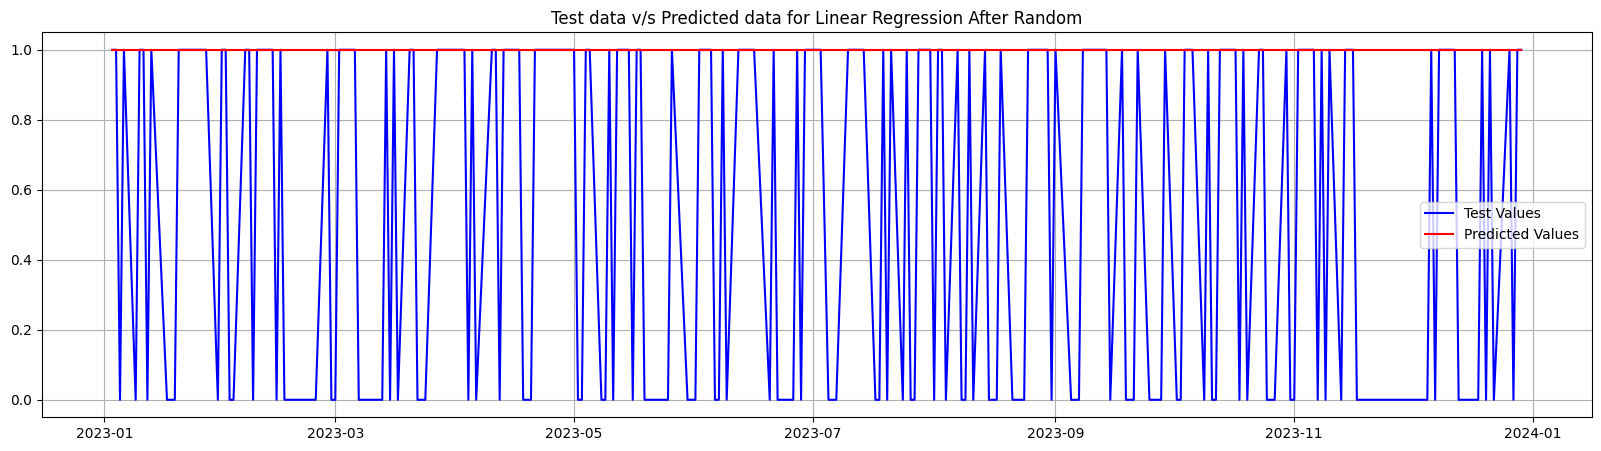

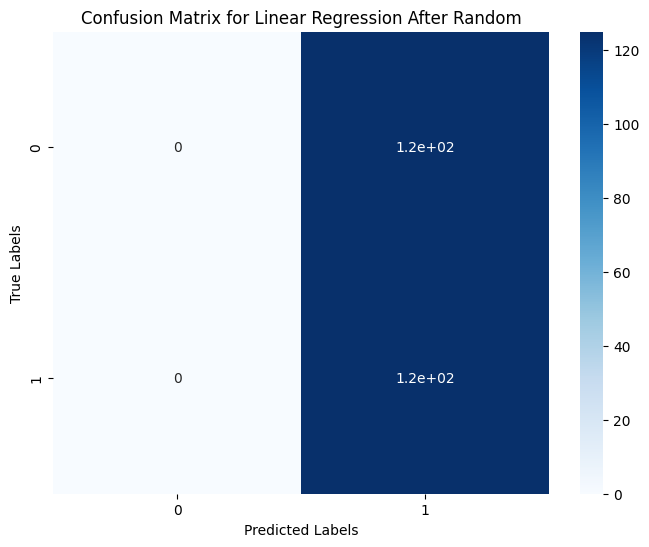



(250,)


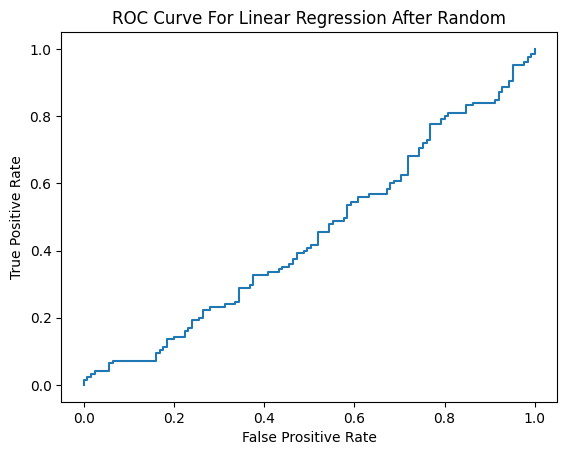



========================= Random Forest Regression After Random =========================
Accuracy is :
 		 trained data:  1.0 
 		 test data:  0.5
--------------------------------------------------
Precision is :
 		 trained data:  1.0 
 		 test data:  1.0
--------------------------------------------------
Recall is :
 		 trained data:  1.0 
 		 test data:  0.0
--------------------------------------------------
F1 score is :
 		 trained data:  1.0 
 		 test data:  0.0


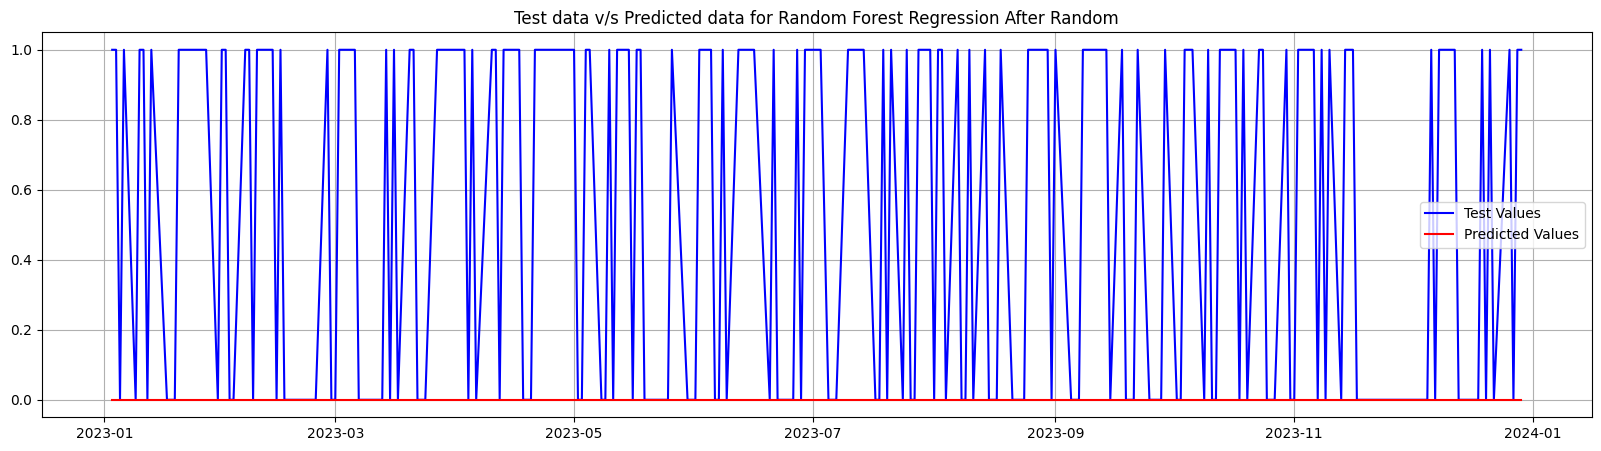

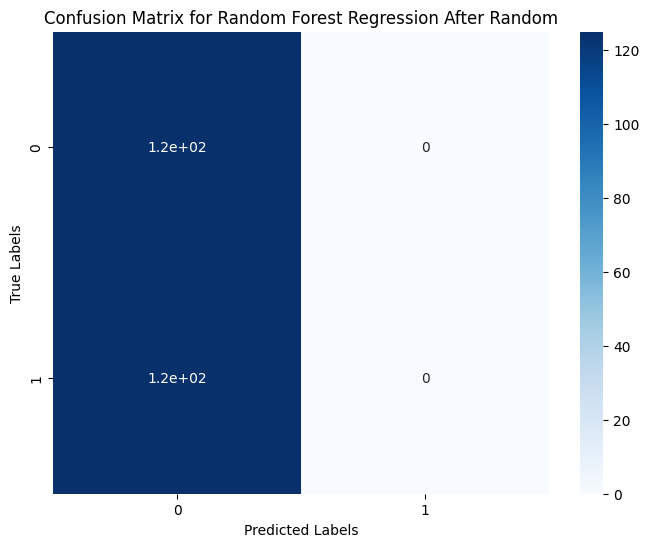



(250,)


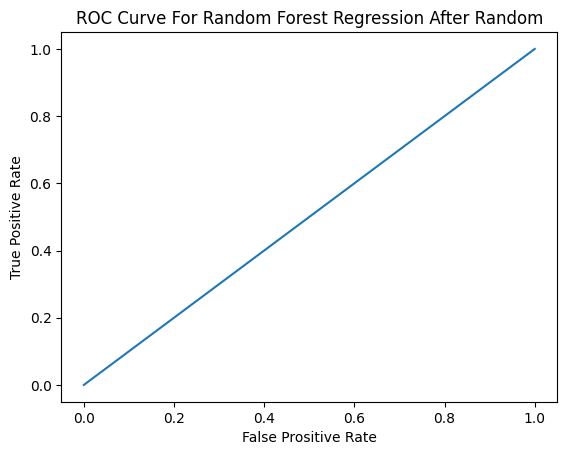



========================= Decision tree After Random =========================
Accuracy is :
 		 trained data:  0.6004765687053217 
 		 test data:  0.5
--------------------------------------------------
Precision is :
 		 trained data:  0.618208516886931 
 		 test data:  0.5
--------------------------------------------------
Recall is :
 		 trained data:  0.6340361445783133 
 		 test data:  1.0
--------------------------------------------------
F1 score is :
 		 trained data:  0.6260223048327137 
 		 test data:  0.6666666666666666


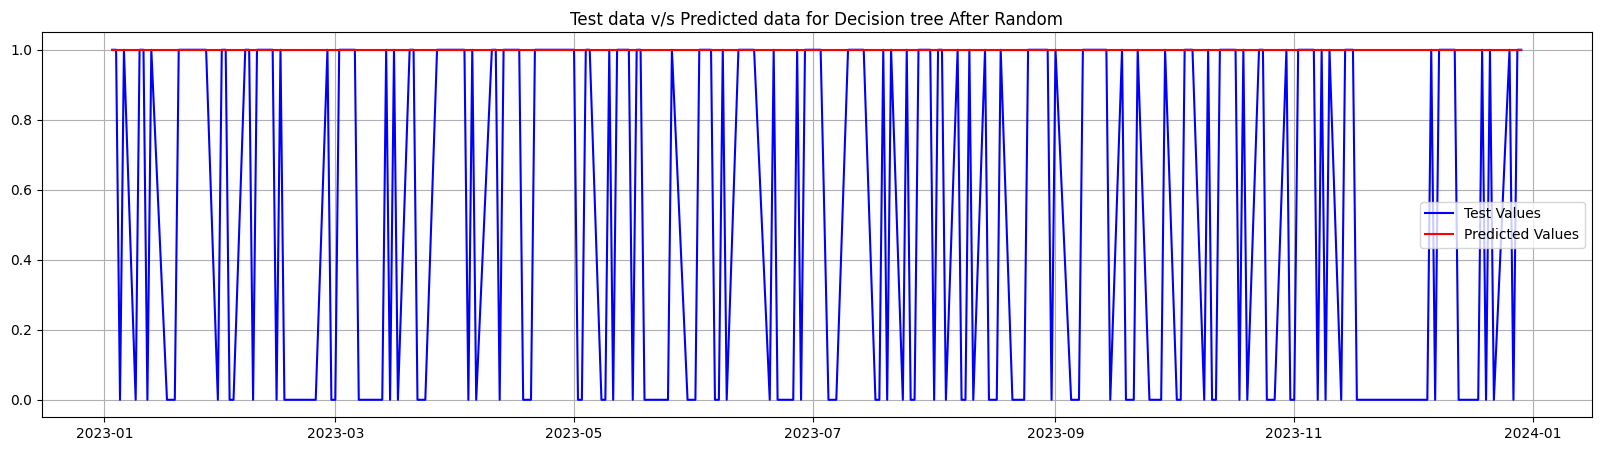

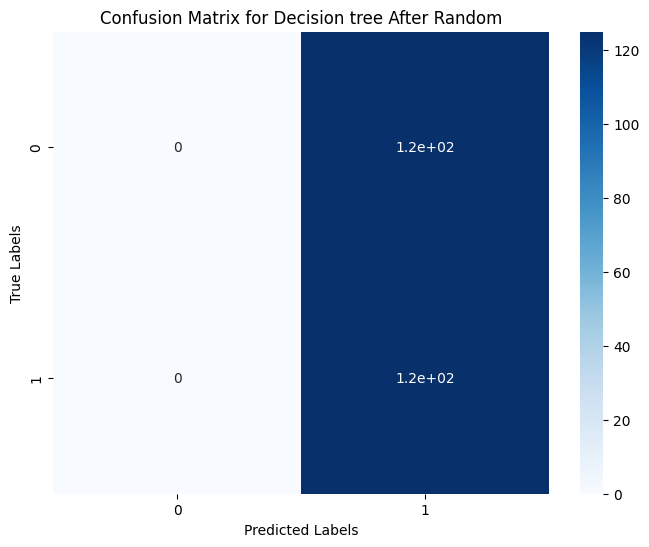



(250,)


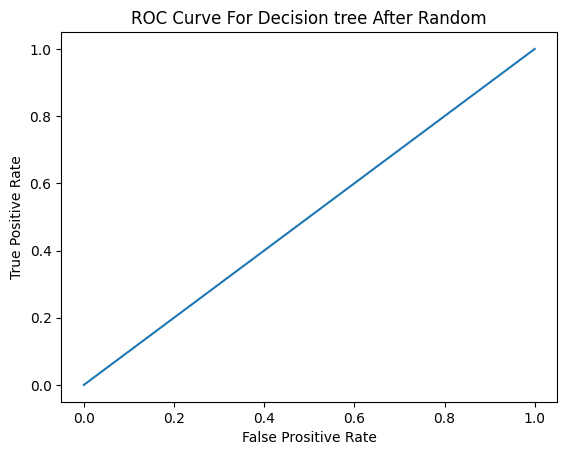

In [196]:
evaluating_clf_models(logistic_gridCV, "Linear Regression After Random", X_train, X_test, Y_train, Y_test)
evaluating_clf_models(random_forest_gridCV, "Random Forest Regression After Random", X_train, X_test, Y_train, Y_test)
evaluating_clf_models(Decision_tree_gridCV, "Decision tree After Random", X_train, X_test, Y_train, Y_test)

##Clustering

In [197]:
data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day,Returns,Clf_Returns
Dates,,,,,,,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,2,1,2018,1,0.000000,0
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,3,1,2018,2,0.018740,1
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,4,1,2018,3,0.003747,1
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,5,1,2018,4,0.011539,1
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,8,1,2018,0,-0.005033,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1,11,2024,4,0.011975,1
2024-11-04,1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,4,11,2024,0,-0.018610,0
2024-11-05,1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,5,11,2024,1,0.000618,1


In [198]:
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['Volatility'] = data['Returns'].rolling(window=10).std()

In [199]:
data

,row_index,Dates,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Month,Year,Day,Returns,Clf_Returns,SMA_10,Volatility
Dates,,,,,,,,,,,,,,,,,
2018-01-02,0,2018-01-02,50.270349,50.495891,49.862633,49.992756,7216000,0.0,0.0,2,1,2018,1,0.000000,0,NaN,NaN
2018-01-03,1,2018-01-03,50.253006,51.146507,50.140233,50.929638,7478400,0.0,0.0,3,1,2018,2,0.018740,1,NaN,NaN
2018-01-04,2,2018-01-04,51.172526,51.536865,50.946980,51.120476,5775900,0.0,0.0,4,1,2018,3,0.003747,1,NaN,NaN
2018-01-05,3,2018-01-05,51.398073,51.779762,51.241926,51.710365,6047700,0.0,0.0,5,1,2018,4,0.011539,1,NaN,NaN
2018-01-08,4,2018-01-08,51.597577,51.762397,50.799499,51.450108,6335800,0.0,0.0,8,1,2018,0,-0.005033,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01,1720,2024-11-01,97.599998,99.800003,97.370003,98.870003,8860200,0.0,0.0,1,11,2024,4,0.011975,1,97.467999,0.006176
2024-11-04,1721,2024-11-04,98.589996,98.809998,96.699997,97.029999,7049100,0.0,0.0,4,11,2024,0,-0.018610,0,97.525999,0.008902
2024-11-05,1722,2024-11-05,96.860001,97.470001,96.150002,97.089996,6348300,0.0,0.0,5,11,2024,1,0.000618,1,97.552999,0.008831


In [200]:
features = data[['Returns', 'Volatility', 'SMA_10']].dropna()
features

,Returns,Volatility,SMA_10
Dates,,,
2018-01-16,0.002649,0.007123,51.541203
2018-01-17,0.001651,0.007012,51.804049
2018-01-18,0.007089,0.005252,52.010508
2018-01-19,0.002783,0.005266,52.212630
2018-01-22,0.002449,0.004534,52.368777
...,...,...,...
2024-11-01,0.011975,0.006176,97.467999
2024-11-04,-0.018610,0.008902,97.525999
2024-11-05,0.000618,0.008831,97.552999


[2 2 2 ... 1 1 1]
             Returns  Volatility     SMA_10  Cluster_3
Dates                                                 
2018-01-16  0.002649    0.007123  51.541203          2
2018-01-17  0.001651    0.007012  51.804049          2
2018-01-18  0.007089    0.005252  52.010508          2
2018-01-19  0.002783    0.005266  52.212630          2
2018-01-22  0.002449    0.004534  52.368777          2
...              ...         ...        ...        ...
2024-11-01  0.011975    0.006176  97.467999          1
2024-11-04 -0.018610    0.008902  97.525999          1
2024-11-05  0.000618    0.008831  97.552999          1
2024-11-06 -0.010403    0.008898  97.395999          1
2024-11-07  0.000416    0.008825  97.292999          1

[1716 rows x 4 columns]
Silhouette Score for k=3: 0.6416762499509677
[[-3.00753050e+01  2.99425583e-04]
 [-2.98124586e+01 -6.90896068e-04]
 [-2.96059993e+01  4.65982536e-03]
 ...
 [ 1.59364913e+01  4.20363479e-04]
 [ 1.57794918e+01 -1.05902642e-02]
 [ 1.56764915e+01

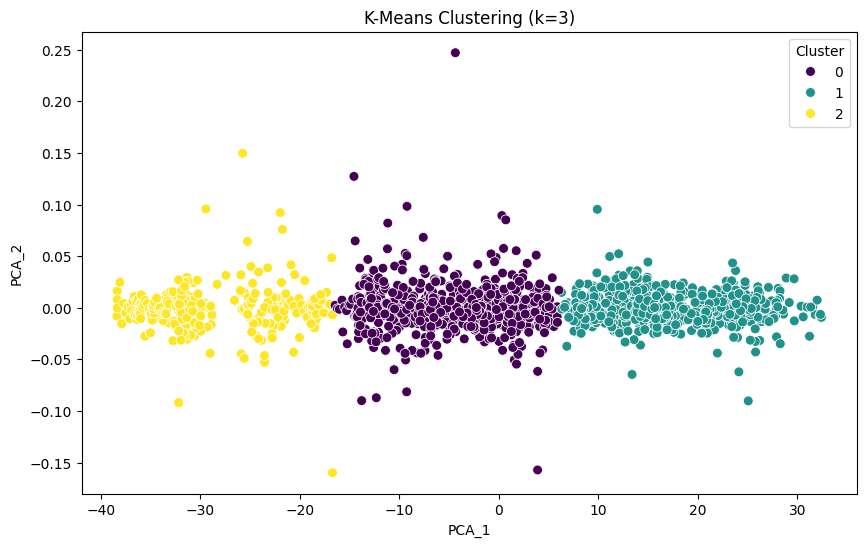

[2 2 2 ... 3 3 3]
             Returns  Volatility     SMA_10  Cluster_3      PCA_1     PCA_2  \
Dates                                                                         
2018-01-16  0.002649    0.007123  51.541203          2 -30.075305  0.000299   
2018-01-17  0.001651    0.007012  51.804049          2 -29.812459 -0.000691   
2018-01-18  0.007089    0.005252  52.010508          2 -29.605999  0.004660   
2018-01-19  0.002783    0.005266  52.212630          2 -29.403877  0.000369   
2018-01-22  0.002449    0.004534  52.368777          2 -29.247731  0.000006   
...              ...         ...        ...        ...        ...       ...   
2024-11-01  0.011975    0.006176  97.467999          1  15.851491  0.011625   
2024-11-04 -0.018610    0.008902  97.525999          1  15.909492 -0.018781   
2024-11-05  0.000618    0.008831  97.552999          1  15.936491  0.000420   
2024-11-06 -0.010403    0.008898  97.395999          1  15.779492 -0.010590   
2024-11-07  0.000416    0.008825  

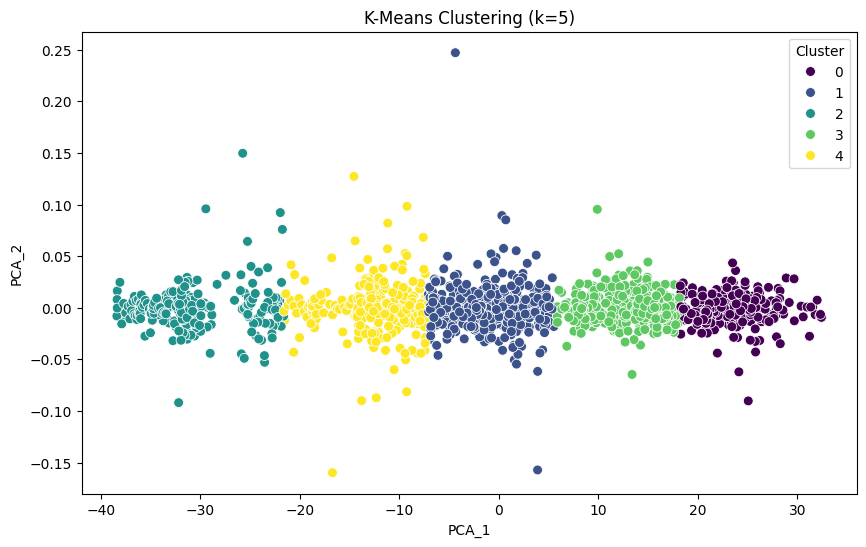

In [201]:
k_values = [3, 5]
for k in k_values:
    kmeans = KMeans(n_clusters=k).fit(features)
    print(kmeans.labels_)
    features[f'Cluster_{k}'] = kmeans.labels_
    print(features)

    # Calculate silhouette score
    score = silhouette_score(features[['Returns', 'Volatility', 'SMA_10']], kmeans.labels_)
    print(f'Silhouette Score for k={k}: {score}')

    # PCA for visualization
    pca = PCA(n_components = 2)
    features_pca = pca.fit_transform(features[['Returns', 'Volatility', 'SMA_10']])
    print(features_pca)
    features['PCA_1'], features['PCA_2'] = features_pca[:, 0], features_pca[:, 1]

    # Plot clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=features[f'PCA_1'], y=features[f'PCA_2'], hue=features[f'Cluster_{k}'], palette='viridis', s=50)
    plt.title(f'K-Means Clustering (k={k})')
    plt.legend(title='Cluster')
    plt.show()


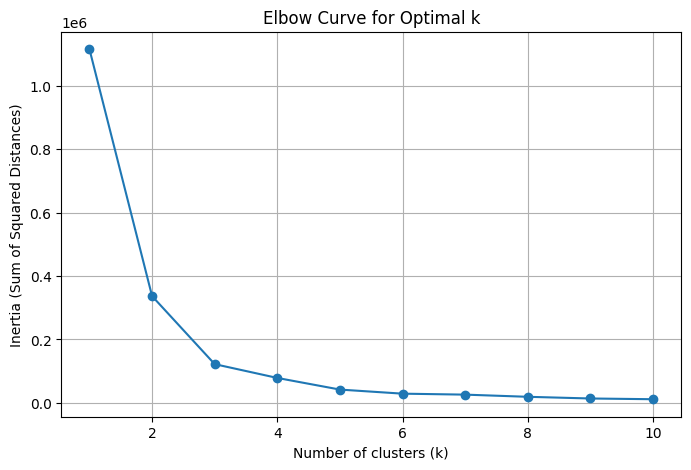

In [202]:
k_values = range(1, 11)
inertia_values = []

# Calculate inertia for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()